  <h1 style="color: #00E676;">Cars 4 You - Machine Learning Projects</h1>

Group: 39
- **Name**: Afonso Pereira **number**: 20250342
- **Name**: Daniel Ribeiro, **number**: 20250376
- **Name**: Pedro Rei, **number**: 20250389
- **Name**: Tomás Boavista, **number**: 20250491

Cars 4 You is a car re-sale platform that buys vehicles from private owners and resells them at a profit. It gathers data online and sends vehicles for mechanical inspection. As the business has grown, inspection backlogs have led potential customers to turn to competitors. To ease this bottleneck, the company has requested the development of a predictive model that estimates a car’s price from the information provided by the user—without requiring an immediate inspection.

  <h1 style="color: #00E676;">Imported Libraries</h1>

In [ ]:
#!pip install rapidfuzz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from sklearn.preprocessing import MinMaxScaler
from rapidfuzz import process, fuzz
import re, unicodedata

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import r_regression

The standard set of essential libraries (numpy, pandas, matplotlib.pyplot, seaborn) was imported.

  <h1 style="color: #00E676;">Import Datasets</h1>

In [2]:
df_train = pd.read_csv("data/train.csv")
print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The dataset has 75973 rows and 14 columns


In [3]:
df_test = pd.read_csv("data/test.csv")
print(f"The dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The dataset has 32567 rows and 13 columns


<table style="width:100%; font-size:12px; border-collapse: collapse;">
  <thead>
    <tr style="background-color:#f2f2f2; text-align:left;">
      <th style="border:1px solid #ddd;">Variable</th>
      <th style="border:1px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="border:1px solid #ddd;">carID </td><td style="border:1px solid #ddd;">An attribute that contains an identifier for each car</td></tr>
    <tr><td style="border:1px solid #ddd;">Brand</td><td style="border:1px solid #ddd;">The car’s main brand (e.g. Ford, Toyota)</td></tr>
    <tr><td style="border:1px solid #ddd;">model</td><td style="border:1px solid #ddd;">The car model</td></tr>
    <tr><td style="border:1px solid #ddd;">year</td><td style="border:1px solid #ddd;">The year of Registration of the Car</td></tr>
    <tr><td style="border:1px solid #ddd;">mileage</td><td style="border:1px solid #ddd;">The total reported distance travelled by the car (in miles)</td></tr>
    <tr><td style="border:1px solid #ddd;">tax</td><td style="border:1px solid #ddd;">The amount of road tax (in £) that, in 2020, was
applicable to the car in question.</td></tr>
    <tr><td style="border:1px solid #ddd;">fuelType</td><td style="border:1px solid #ddd;">Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)</td></tr>
    <tr><td style="border:1px solid #ddd;">mpg</td><td style="border:1px solid #ddd;">Average Miles per Gallon</td></tr>
    <tr><td style="border:1px solid #ddd;">engineSize</td><td style="border:1px solid #ddd;">Size of Engine in liters (Cubic Decimeters)</td></tr>
    <tr><td style="border:1px solid #ddd;">paintQuality%</td><td style="border:1px solid #ddd;">The mechanic’s assessment of the cars’ overall paint
quality and hull integrity (filled by the mechanic during evaluation).</td></tr>
    <tr><td style="border:1px solid #ddd;">previousOwners</td><td style="border:1px solid #ddd;">Number of previous registered owners of the vehicle.</td></tr>
    <tr><td style="border:1px solid #ddd;">hasDamage</td><td style="border:1px solid #ddd;">Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or not.</td></tr>
    <tr><td style="border:1px solid #ddd;">price</td><td style="border:1px solid #ddd;">The car’s price when purchased by Cars 4 You (in £).</td></tr>
  </tbody>
</table>

  <h1 style="color: #00E676;">1. Initial Data Inspection</h1>

In [9]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [10]:
df_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [12]:
pct_missing = (df_train.isna().mean() * 100).round(2)
pct_missing_str = pct_missing.map(lambda x: f"{x:.2f}%")
pct_missing_str

carID              0.00%
Brand              2.00%
model              2.00%
year               1.96%
price              0.00%
transmission       2.00%
mileage            1.93%
fuelType           1.99%
tax               10.40%
mpg               10.43%
engineSize         2.00%
paintQuality%      2.01%
previousOwners     2.04%
hasDamage          2.04%
dtype: object

In [13]:
df_train.duplicated().sum()

np.int64(0)

After the initial data inspection, we verified that there are **no duplicate rows**. However, there are **missing values** in almost all columns only `carID` and the target `price` **have no missing data**. We also confirmed the **data types** of the variables and identified **categorical features** that will need to be handled later.

In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


After the statistical description of our data, we detected **several inconsistencies**. In the year column, there are values greater than 2020 (the maximum date in our dataset), and we observe a minimum value that is far from the first quartile (25%), indicating the presence of **outliers** in that column. Regarding outliers, **all columns** show this distance, these will be analyzed in more detail to determine whether they are indeed outliers or not. We also identified **impossible values**, namely negatives, in the `mileage`, `tax`, `mpg`, `engineSize`, and `previousOwners` columns, which does not make sense given their definitions. Finally, in the hasDamage column, we only see **0** or **N/A**; therefore, we will **probably remove it**.

 <h2 style="color: #00E676;">1.1 Negative and Null Observations</h2>

In [15]:
col = {
    "mileage < 0":         df_train["mileage"] < 0,
    "mpg < 0":             df_train["mpg"] < 0,
    "tax < 0":             df_train["tax"] < 0,
    "previousOwners < 0":  df_train["previousOwners"] < 0,
    "engineSize < 0":      df_train["engineSize"] < 0,
}

for label, mask in col.items():
    col = label.split()[0]
    display(Markdown(f"The number of observations that are negative in **`{col}`** is **{int(mask.sum())}**."))

The number of observations that are negative in **`mileage`** is **369**.

The number of observations that are negative in **`mpg`** is **36**.

The number of observations that are negative in **`tax`** is **378**.

The number of observations that are negative in **`previousOwners`** is **371**.

The number of observations that are negative in **`engineSize`** is **84**.

 <h3 style="color: #00E676;"> 1.1.2 Mileage</h3>

In [16]:
df_train.loc[df_train["mileage"] < 0].sort_values("mileage")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
843,7845,BMW,3 Series,2019.0,23498,Semi-Auto,-58540.574478,Diesel,145.0,54.3,2.0,38.0,NaN,0.0
1580,9246,BMW,2 Series,2019.0,24450,Manual,-58540.574478,Diesel,145.0,60.1,2.0,78.0,4.0,0.0
8673,13710,BMW,M3,2004.0,17850,Manual,-58540.574478,Petrol,325.0,23.3,3.2,68.0,1.0,0.0
11088,11313,BMW,X3,2015.0,12250,Automatic,-58540.574478,Diesel,NaN,54.3,2.0,43.0,3.0,0.0
12607,9058,BMW,2 Series,2019.0,23450,Semi-Auto,-58540.574478,Petrol,150.0,48.7,1.5,93.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57208,34401,Hyundai,I10,2019.0,8590,Manual,-36635.042697,Petrol,150.0,60.1,1.0,42.0,2.0,0.0
54200,33436,Hyundai,Tucson,2019.0,21490,Manual,-36635.042697,Petrol,145.0,34.9,1.6,56.0,3.0,0.0
16311,31434,Hyundai,I20,2018.0,8980,Manual,-36635.042697,Petrol,145.0,55.4,1.2,61.0,3.0,0.0
20141,34786,Hyundai,I800,2019.0,18490,Manual,-36635.042697,diesel,150.0,31.7,2.5,39.0,2.0,0.0


In [17]:
df_train.loc[df_train["mileage"] < 0, "mileage"].mean()

np.float64(-47040.576642624925)

In [18]:
df_train.loc[df_train["mileage"] > 0, "mileage"].sort_values()

70608         1.0
30601         1.0
37684         1.0
15119         1.0
72152         1.0
           ...   
33484    241565.0
45843    250650.0
55413    259000.0
4840     300000.0
6658     323000.0
Name: mileage, Length: 74141, dtype: float64

It was considered to convert the negative values to positive ones; however, they are all well above the maximum of the positive values and somewhat **unrealistic**. For this reason, we deemed them impossible values; thus, we will set them to `N/A` and subsequently **handle them**.

<h3 style="color: #00E676;">1.1.3. mpg</h3>

In [ ]:
df_train.loc[df_train["mpg"] < 0].sort_values("mpg")

We noticed that the **negative mpg values** all belong to the `BMW` brand; for this reason, we will **modify** the corresponding **mpg values**.

<h3 style="color: #00E676;">1.1.4 Tax</h3>

In [ ]:
df_train.loc[df_train["tax"] < 0].sort_values("tax")

In [ ]:
df_train.loc[df_train["tax"] < 0, "tax"].mean()

In [ ]:
df_train.loc[df_train["tax"] > 0, "tax"].mean()

The negative values of the `tax` will be **converted to positive**, since when doing so, the values fall approximately within the normal range. Therefore, we will assume it was a **typing error** in the `tax` value.

<h3 style="color: #00E676;">1.1.5 previousOwners</h3>

In [ ]:
df_train.loc[df_train["previousOwners"] < 0].sort_values("previousOwners")

In [ ]:
df_train.loc[df_train["previousOwners"] > 0, "previousOwners"].mean()

In [ ]:
df_train.loc[df_train["previousOwners"] < 0, "previousOwners"].mean()

In [ ]:
previousOwners_n = pd.to_numeric(df_train["previousOwners"], errors="coerce")
decimal = previousOwners_n.notna() & (previousOwners_n % 1 != 0)

decimal.sum()

We will **convert** the negative values to positive ones due to a possible **typing error**, as the **averages** are **similar**. In addition, we will **round** the **734** observations to whole numbers, since it does not make sense to have `previous owners` with decimal values.

<h3 style="color: #00E676;">1.1.6 EngineSize</h3>

In [ ]:
df_train.loc[df_train["engineSize"] < 0].sort_values("engineSize")

In [ ]:
eng_neg = pd.to_numeric(df_train["engineSize"], errors="coerce") < 0
df_train.loc[eng_neg, "Brand"].value_counts(dropna=False)

In [ ]:
eng_neg = pd.to_numeric(df_test["engineSize"], errors="coerce") < 0
df_test.loc[eng_neg, "Brand"].value_counts(dropna=False)

We noticed that the negative `engineSize` values all **belong** to the **Ford brand**; for this reason, we will **replace** the corresponding `engineSize`values with the respective values for that brand.

<h3 style="color: #00E676;"> 1.1.7. paintQuality%</h3>

In [ ]:
df_train.loc[df_train["paintQuality%"] > 100].sort_values("paintQuality%")

In [ ]:
(df_train["paintQuality%"] > 100).value_counts(dropna=False)

We have **367** samples with values above 100%; we will **remove** these observations as they do **not make sense** and show no apparent relationship with any variable.

<h3 style="color: #00E676;"> 1.1.8. Year</h3>

In [ ]:
(df_train["year"] > 2020).value_counts(dropna=False)

We will **remove** the **358** observations with values greater than **2020**, as the database only covers data up to that year.

In [ ]:
df_train["hasDamage"].value_counts(dropna=False)

We verified that we have **7 columns** with several negative values; we will remove these values later. We also confirmed our suspicion about the values in the `hasDamage` column, with **74,425** being `0` and the remaining **1,548** being `N/A`; therefore, we will remove the column, as it will not be relevant to our analysis.

<h2 style="color: #00E676;"> 1.2 Digitalization Problems </h2>

In [ ]:
cols = ["Brand", "model", "fuelType", "transmission"]
for col, n in df_train[cols].nunique().items():
    display(Markdown(f"In the `{col}` column there are **{n}** different types of {col}"))

In [ ]:
df_train["Brand"] = df_train["Brand"].astype(str).str.strip().str.title()
brand_counts = df_train["Brand"].value_counts(dropna=False)
brand_counts

The **car brands** in the dataset are expected to be one of the following valid options: **VW**, **Toyota**, **Audi**, **Ford**, **BMW**, **Skoda**, **Opel**, **Mercedes**, **Hyundai**. Some categories have **digitalization problems**.

In [ ]:
df_train["fuelType"] = df_train["fuelType"].astype(str).str.strip().str.title()
fuelType_counts = df_train["fuelType"].value_counts(dropna=False)
fuelType_counts

The **types of fuel** used by the car are **Diesel**, **Petrol**, **Hybrid**, **Electric**.  Any category different from these are not permitted. Some categories have digitalization problems.

In [ ]:
df_train["transmission"] = df_train["transmission"].astype(str).str.strip().str.title()
transmission_counts = df_train["transmission"].value_counts(dropna=False)
transmission_counts

The **types of transmission** in the dataset are expected to be **Manual**, **Semi-Auto**, or **Automatic**.
Any value that differs from these three categories is considered **invalid**. Some categories have **digitalization problems**.

In [ ]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

 <h2 style="color: #00E676;">1.3. Data Exploration</h2>

- Explore data visually;
- Extract relevant insights;
- Analyse multivariate relationships.

<h4 style="color: #00E676;">Pairplot of key numerical variables</h4> 

In [ ]:
sns.pairplot(df_train[["price","mileage", "mpg", "engineSize", "tax"]], diag_kind="kde")
plt.suptitle("PairWise relationships Between Numerical Variables",
             y=1,
             fontsize=16)
plt.show()

Even in raw data, we can see **negative correlation** between `price` and `mileage`, and **positive correlation** between `price` and `engine size`. Noise and **missing values** reduce clarity, but initial **trends** are observable.

<h4 style="color: #00E676;">Multivariate Analysis - FuelType, Mileage, Price</h4> 

In [ ]:
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="fuelType",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by FuelType", fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis **confirms that depreciation** (the negative relationship between `Price` and `Mileage`) holds universally for the most common fuel types (Diesel and Petrol). However, `FuelType` acts as a shifting factor: Hybrid and (to a lesser extent) Electric cars are concentrated in the low `Mileage` and high Price area, indicating they are **newer** and **more expensive models** in the dataset. This pattern justifies the **importance** of including both `Mileage` (continuous) and `Fuel Type` (categorical) in the predictive model.

<h4 style="color: #00E676;">Multivariate Analysis - Brand, Mileage, Price</h4> 

In [ ]:
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="Brand",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by Brand)",
          fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis reveals **significant segmentation** and **vertical stratification** by **brand**. While all `brands` adhere to the general principle of depreciation (`Price` decreases with `Mileage`), **premium brands** such as `Audi`, `BMW`, and `Mercedes` form **distinct**, **higher clusters**, showing consistently **higher prices** than mass-market brands like `Ford`, `Toyota`, and `Vw` at any given mileage point. This confirms that `Brand` is a **powerful categorical feature** whose market segment is **highly correlated** with the initial price and the retained value throughout the vehicle's lifespan, necessitating its inclusion via one-hot encoding in the model.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color=fuelType</h4> 

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",              
    y="price",                
    hue="fuelType",           
    palette="Set2",             
    alpha=0.7,                 
    edgecolor="k"            
)

# Titles and labels
plt.title("Price vs Year — Colored by FuelType",
          fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis confirms the **strong positive relationship** between `Year` and `Price` (newer cars are more expensive) across all fuel types. `FuelType` causes a **horizontal** and **vertical segmentation**: `Petrol` and `Diesel` cars span the entire time range, representing the **full depreciation curve**. In contrast, `Hybrid` and `Electric` vehicles clustes heavily towards the most recent years (high Year values), commanding **higher baseline prices** than their conventional counterparts at the same age. This confirms that both the continuous variable `Year` and the categorical variable `FuelType` are **essential predictors** of the vehicle's value.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color= Brand</h4> 

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",                
    y="price",                 
    hue="Brand",             
    palette="Set2",           
    alpha=0.7,                 
    edgecolor="k"               
)


plt.title("Price vs Year — Colored by Brand", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis shows a clear **stratification** of **prices** by `brand`, confirming the **premium status** of certain manufacturers. All brands adhere to the fundamental rule that `Price` increases with `Year` (newer cars are more expensive). However, **Premium Brands** (`Audi`, `BMW`, `Mercedes`) form distinct, higher price clusters at any given year compared to **Mass-Market Brands** (`Ford`, `Toyota`, `VW`, `Opel`, `Hyundai`). This strong vertical separation confirms that `Brand` is a **critical predictor** of value, determining the `price` segment and baseline value of the vehicle regardless of its age. The **difference** in price retention and the ceiling price for the newer models are **visibly highest**for the premium group.

<h4 style="color: #00E676;">Pairplot to Brand</h4> 

In [ ]:
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="Brand",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)
plt.suptitle("Pairplot —Car Attributes by Brand",
             y=1.02,
             fontsize=16)
plt.show()

The pairplot **validates all previous multivariate** findings simultaneously. It confirms the **strong positive correlations** for Price vs. Year and `Price` vs. `Engine Size` and the **negative correlation** for `Price` vs. `Mileage`. Critically **Premium Brands** `Audi` `BMW` `Mercedes` consistently occupy the **highest** price and engine size clusters while Mass-Market Brands concentrate in the **lower ranges**. The plot confirms `Brand` is the **most significant categorical differentiator** dictating the expected distribution and maximum values for all other key numerical attributes.

<h4 style="color: #00E676;">Price distribution by Brand</h4> 

In [ ]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.boxplot(
    data=df_filtered,
    x="Brand",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Brand", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis shows **strong vertical stratification** of **median prices**: Premium Brands (`Mercedes`, `Audi`, `BMW`) exhibit the **highest median prices** and generally **have larger Interquartile Ranges** (IQR), indicating **higher price variability** and **value retention**. Mass-Market Brands (`Ford`, `VW`, `Toyota`, `Skoda`, `Opel`, `Hyundai`) form the **lower price** tier, with significantly **lower median prices** and generally smaller IQRs. All `brands` display a possible large number of **outliers** (individual points above the upper whisker), confirming the presence of **high-value**, **high-price vehicles** (e.g., performance or rare models) even within the standard brands. This strong **segmentation validates** the decision to use one-hot encoding on the `Brand` feature in the predictive model.

<h4 style="color: #00E676;">Price Distribution by Transmission</h4> 

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.boxplot(
    data=df_filtered,
    x="transmission",
    y="price",
    palette="Set2"
)

plt.title("Price Distribution by Transmission Type", fontsize=16)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The analysis confirms a **strong vertical stratification** in median prices: `Automatic` cars exhibit the **highest median price**, followed closely by `Semi-Auto`, while `Manual` cars have the **lowest median price**. Both automatic and `semi-automatic` `transmissions` display a greater `price` variability (larger interquartile range and longer whiskers), indicating they cover a **wider range** of **high-end** and **luxury vehicles** compared to `manual transmissions`. This segmentation is a **fundamental finding of the EDA**, underscoring why `transmission` type is a **critical categorical feature** for the predictive model.

<h4 style="color: #00E676;">Price Distribution by FuelType</h4> 

In [ ]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x="fuelType",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The box plot of `Price` segmented by `Fuel Type` confirms **significant differences** in market value driven by **technology**. The analysis shows that `Hybrid` and `Electric` vehicles exhibit the **highest median prices** compared to the conventional `Diesel` and `Petrol` groups. `Diesel` cars occupy a mid-to-high price range, suggesting they retain **higher value** than petrol cars on average, which typically have the **lowest median price**. All segments display a similar spread of possible **outliers**, confirming the presence of high-value specialty vehicles across all `fuel types`. This segmentation validates `Fuel Type` as a critical categorical feature for predicting vehicle price.

<h4 style="color: #00E676;">Key Car Attributes by Transmission</h4> 

In [ ]:
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="transmission",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Transmission", y=1.02, fontsize=16)
plt.show()

The pairplot provides comprehensive confirmation that `Transmission` is a **major segmenting factor** in the used car market, influencing the **distribution and relationships** of all other key attributes. `Automatic` and `Semi-Auto` vehicles consistently form higher value clusters across the plots: they dominate the highest price ranges (`Price` vs. `Year/EngineSize`) and are strongly associated with larger `Engine Sizes` (`EngineSize` vs. `Mileage/Price`). In contrast, **Manual** vehicles typically occupy the **lower to mid-range values** in `Price` and `Engine Size`, while their mileage is spread more widely across all years. This **stratification** confirms that the **complexity** and market preference for **automatic transmissions** set a fundamentally higher baseline value and are linked to more expensive, powerful vehicles.

<h4 style="color: #00E676;">Key Car Attributes by Fuel Type</h4> 

In [ ]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="fuelType",
    palette="coolwarm",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Fuel Type", y=1.02, fontsize=16)
plt.show()

The pairplot provides a comprehensive view of how` Fuel Type` **segments** the vehicle market based on **value**, **age**, and **engine characteristics**. `Hybrid` and `Electric` vehicles consistently form distinct clusters at the **highest prices** (`Price` vs. `Year/Mileage`) and are heavily concentrated in the newest years (high Year values). Critically, they also cluster around the **smallest engine sizes** (`Engine Size` plots). `Petrol` and `Diesel` vehicles, representing the **conventional market**, span the entire range of values and are associated with a broader spectrum of `engine sizes` and `prices`. This segmentation **confirms** that `Fuel Type` is a **primary categorical differentiator**, separating the established depreciation curve of conventional cars from the **high-value**, **low-mileage** profile of newer, alternative-fuel technologies.

<h4 style="color: #00E676;">Correlation Matrix before cleaning the data</h4> 

In [ ]:
num = df_train.select_dtypes(include="number").drop(columns=["carID", "hasDamage"], errors="ignore")
corr = num.corr(numeric_only=True).round(2)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

The matrix immediately confirms the **strongest linear relationships** with the **target variable**, `price`. `engineSize` exhibits the **strongest positive correlation** ($\approx$ 0.61). `Year` follows closely with a **strong** ($\approx$ 0.48), indicating that newer cars are **significantly more expensive**. The only notable **negative relationship** is with `mileage` ($\approx$ -0.41), confirming that higher mileage leads to a **lower price** (depreciation). **High** inter-feature **correlations**, such as between `engineSize` and `tax` ($\approx$ 0.26), also highlight potential **multicollinearity issues** that might require attention during model selection (e.g., using regularization techniques). Overall, the **heatmap validates** `Year` and `engineSize` as the **most influential numerical predictors** of price.

<h1 style="color: #00E676;">2. Data Preprocessing</h1>

In [113]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [114]:
df_train.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.00,74482.00,75973.00,74510.00,68069.00,68047.00,74457.00,74449.00,74423.00,74425.0
mean,37986.00,2017.10,16881.89,23004.18,120.33,55.15,1.66,64.59,1.99,0.0
std,21931.66,2.21,9736.93,22129.79,65.52,16.50,0.57,21.02,1.47,0.0
min,0.00,1970.00,450.00,-58540.57,-91.12,-43.42,-0.10,1.64,-2.35,0.0
25%,18993.00,2016.00,10200.00,7423.25,125.00,46.30,1.20,47.00,1.00,0.0
50%,37986.00,2017.00,14699.00,17300.00,145.00,54.30,1.60,65.00,2.00,0.0
75%,56979.00,2019.00,20950.00,32427.50,145.00,62.80,2.00,82.00,3.00,0.0
max,75972.00,2024.12,159999.00,323000.00,580.00,470.80,6.60,125.59,6.26,0.0


In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [116]:
df_train_new = df_train.copy()
df_test_new  = df_test.copy()


<h4 style="color: #00E676;">Remove column "HasDamage"</h4> 

In [117]:
def initial_cleaning(df):
    if "hasDamage" in df.columns:
        df = df.drop(columns=["hasDamage"])
    
    return df

In [118]:
df_train_new = initial_cleaning(df_train_new)
df_test_new = initial_cleaning(df_test_new)
df_train_new.head()


,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000


**Dropping** the `HasDamage` column, since all known values are `0` and the variable has **no relevance** for the model.

<h2 style="color: #00E676;">2.1. Digitalization Problems Solve</h2>

<h3 style="color: #00E676;">2.1.1. Brand </h3>

**Correction** of the **brand names** in the `Brand` column, with only the `N/A` **values remaining**.

In [119]:
def dig_solve_brand(df):
    brand_clean = df["Brand"].astype(str).str.strip().str.lower()

    # 2 — Dicionário de correções
    corrections = {
        "ercece": "mercedes", "mercede": "mercedes", "ercedes": "mercedes", "ercede": "mercedes",
        "for": "ford", "ord": "ford", "or": "ford",
        "bmw": "bmw", "mw": "bmw", "bm": "bmw", "m": "bmw",
        "ope": "opel", "pel": "opel", "pe": "opel",
        "vw": "vw", "w": "vw", "v": "vw",
        "aud": "audi", "udi": "audi", "ud": "audi",
        "oyota": "toyota", "toyot": "toyota", "oyot": "toyota",
        "koda": "skoda", "skod": "skoda", "kod": "skoda",
        "hyunda": "hyundai", "yundai": "hyundai", "yunda": "hyundai",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # 3 — Aplicar correções
    brand_clean = brand_clean.replace(corrections)

    # 4 — Converter para Title Case (BMW → Bmw → preferes?)
    df["Brand_clean"] = brand_clean.str.title()

    return df

In [120]:
df_train_new = dig_solve_brand(df_train_new)
df_test_new = dig_solve_brand(df_test_new)
df_train_new["Brand_clean"].value_counts(dropna=False)


Brand_clean
Ford        16063
Mercedes    11674
Vw          10385
Opel         9352
Bmw          7392
Audi         7325
Toyota       4622
Skoda        4303
Hyundai      3336
NaN          1521
Name: count, dtype: int64

<h3 style="color: #00E676;">2.1.2. Fuel Type </h3>

**Correct** the **names** of the **different fuel types** in the `Fueltype` column, leaving only the `N/A` **values remaining**.

In [121]:
def dig_solve_type(df):
    fuel = df["fuelType"].astype(str).str.strip().str.lower()

    # Correções
    corrections = {
        "petro": "petrol", "etrol": "petrol", "etro": "petrol",
        "iesel": "diesel", "diese": "diesel", "iese": "diesel",
        "hybri": "hybrid", "ybrid": "hybrid", "ybri": "hybrid",
        "othe": "other", "ther": "other",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # Corrigir
    fuel = fuel.replace(corrections)

    df["fuelType_clean"] = fuel

    return df

In [122]:
df_train_new = dig_solve_type(df_train_new)
df_test_new = dig_solve_type(df_test_new)
df_train_new["fuelType_clean"].value_counts(dropna=False)


fuelType_clean
petrol      41181
diesel      30885
hybrid       2225
NaN          1511
other         167
electric        4
Name: count, dtype: int64

<h3 style="color: #00E676;">2.1.3. Transmission </h3>


**Correct** the **names** of the **different transmission types** in the `transmission` column, leaving only the `N/A` **values remaining**

In [123]:
def dig_solve_transmission(df):
    tr = df["transmission"].astype(str).str.strip().str.lower()

    corrections = {
        "anual": "manual", "manua": "manual", "anua": "manual",
        "semi-aut": "semi-auto", "emi-auto": "semi-auto", "emi-aut": "semi-auto",
        "automati": "automatic", "utomatic": "automatic", "utomati": "automatic",
        "unknow": "unknown", "nknown": "unknown", "nknow": "unknown",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": "unknown"
    }

    # aplicar correções
    tr = tr.replace(corrections)

    # nova coluna
    df["transmission_clean"] = tr

    return df

In [124]:
df_train_new = dig_solve_transmission(df_train_new)
df_test_new = dig_solve_transmission(df_test_new)
df_test_new["transmission_clean"].value_counts(dropna=False)


transmission_clean
manual       17889
semi-auto     7267
automatic     6440
NaN            623
unknown        345
other            3
Name: count, dtype: int64

In [125]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 16)
(32567, 15)


<h3 style="color: #00E676;">2.1.4. Model - Correction model names with RapidFuzz </h3>

A normalization function `(_norm)` was developed to **standardize strings** before correction, converting them to **lowercase**, **special characters**, and **extra spaces** to ensure **consistent comparisons**.

Then, the `find_best_in_catalog` function was created to check whether a **value exists** in the **canonical catalog** and, if not, apply approximate **matching** (fuzzy matching) using the `RapidFuzz` library. The algorithms `token_set_ratio` and `token_sort_ratio` were used, returning the most **similar value**, its similarity score, and the method applied. Two `thresholds` (threshold_high and threshold_low) were also defined to **control** the **confidence level** of accepted matches.

Based on this function, a **canonical catalog** of models was built for **each brand**, considering only models with a frequency above a brand-specific limit defined in `threshold_dict`. For each brand, the function was applied within its ***respective catalog**, and valid matches (`token_set` or `token_sort`) were stored in a **mapping** dictionary (`model_cleaning_dict`).

Finally, the `model_clean_fuzzy` column was created to apply the **automatic corrections** stored in the **dictionary**, **keeping** the **original value** when **no match** was found. This process ensured the standardization of model names within each brand,** reducing spelling errors** and **inconsistencies**.

In [126]:
def _norm(s):
    if s is None or (isinstance(s, float) and pd.isna(s)):
        return ""
    s = str(s).casefold().strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[/_.\-]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s


def find_best_in_catalog(word, catalog_list, threshold_high=92, threshold_low=85):
    if word is None or (isinstance(word, float) and pd.isna(word)):
        return (word, 0.0, "null")
    if not catalog_list:
        return (word, 0.0, "no_catalog")

    word_norm = _norm(word)

    # canonical representation of the catalog
    norm_map = {_norm(c): c for c in catalog_list}

    # Already exists in the catalog?
    if word_norm in norm_map:
        return (word, 100.0, "exact_in_catalog")

    # fuzzy matching
    best, score, _ = process.extractOne(word_norm, catalog_list, scorer=fuzz.token_set_ratio)
    method = "token_set"

    best2, score2, _ = process.extractOne(word_norm, catalog_list, scorer=fuzz.token_sort_ratio)
    if score2 > score:
        best, score, method = best2, score2, "token_sort"

    if score >= threshold_high:
        return (best, float(score), method)
    elif score >= threshold_low:
        return (best, float(score), method)
    else:
        return (best, float(score), "review")


def build_model_catalog(df_train, threshold_dict):
    catalog_dict = {}

    for brand in df_train["Brand_clean"].dropna().unique():
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()

        freq = (
            df_brand
            .dropna(subset=["model"])
            .groupby("model")
            .size()
            .reset_index(name="count")
            .sort_values(by="count", ascending=False)
        )

        threshold = threshold_dict.get(brand, 0)

        most_freq_models = list(freq[freq["count"] >= threshold]["model"])
        catalog_dict[brand] = most_freq_models

    return catalog_dict


def build_model_cleaning_dict(df_train, catalog_dict, threshold_dict):
    cleaning_dict = {}

    for brand in df_train["Brand_clean"].dropna().unique():
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()

        catalog_list = catalog_dict.get(brand, [])

        for model in df_brand["model"].dropna().unique():
            match, score, status = find_best_in_catalog(
                model,
                catalog_list,
                threshold_high=92,
                threshold_low=85
            )

            if status in ("token_set", "token_sort", "exact_in_catalog"):
                cleaning_dict[f"{brand}-{model}"] = match

    return cleaning_dict


def apply_model_cleaning(df, cleaning_dict):
    df["model_clean_fuzzy"] = (
        (df["Brand_clean"] + "-" + df["model"])
        .map(cleaning_dict)
        .fillna(df["model"])
    )
    df["model_clean_fuzzy"] = (
        df["model_clean_fuzzy"]
        .astype(str)
        .str.strip()
        .str.casefold()
    )    
    return df

In [127]:
threshold_dict = {
    "ford": 139,
    "vw": 40,
    "opel": 66,
    "mercedes": 128,
    "bmw": 66,
    "audi": 219,
    "toyota": 34,
    "skoda": 86,
    "hyundai": 70,
}

In [128]:
catalog_dict = build_model_catalog(df_train_new, threshold_dict)
model_cleaning_dict = build_model_cleaning_dict(df_train_new, catalog_dict, threshold_dict)
df_train_new = apply_model_cleaning(df_train_new, model_cleaning_dict)
df_test_new = apply_model_cleaning(df_test_new, model_cleaning_dict)


In [129]:
df_train_new["model_clean_fuzzy"].apply(type).value_counts()

model_clean_fuzzy
<class 'str'>    75973
Name: count, dtype: int64

In [130]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'Brand', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')


In [131]:
df_train_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)
df_test_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)

In [132]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'paintQuality%', 'previousOwners', 'Brand_clean', 'fuelType_clean',
       'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')


In [133]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 13)
(32567, 12)


<h2 style="color: #00E676;">2.2. Solve inconsistencies</h2>

<h3 style="color: #00E676;">2.2.1. Convert to N/A - Mileage, paintquality%</h3> 

In [134]:
def convert_to_na(df):
    # mileage: converter para numérico + tratar negativos
    df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
    df["mileage"] = df["mileage"].where(df["mileage"] >= 0, other=np.nan)

    # paintQuality%: converter para numérico + validar 0–100
    df["paintQuality%"] = pd.to_numeric(df["paintQuality%"], errors="coerce")
    df["paintQuality%"] = df["paintQuality%"].where(
        df["paintQuality%"].between(0, 100),
        other=np.nan
    )

    return df

In [135]:
df_train_new = convert_to_na(df_train_new)
df_test_new = convert_to_na(df_test_new)


In [136]:
print((df_train_new["mileage"] < 0).sum(), (df_test_new["mileage"] < 0).sum())
print((~df_train_new["paintQuality%"].between(0, 100).fillna(False)).sum(), (~df_test_new["paintQuality%"].between(0, 100).fillna(False)).sum())

0 0
1891 793


In [137]:
print(df_train_new["paintQuality%"].isnull().sum())
print(df_test_new["paintQuality%"].isnull().sum())

1891
793


In [138]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 13)
(32567, 12)


<h3 style="color: #00E676;">2.2.2. Solve Mpg</h> 

In [139]:
def fix_mpg(df_to_fix, reference_df):

    # mpg do dataset a corrigir
    mpg_fix = pd.to_numeric(df_to_fix["mpg"], errors="coerce")
    model_fix = df_to_fix["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mpg do dataset de referência (train)
    mpg_ref = pd.to_numeric(reference_df["mpg"], errors="coerce")
    model_ref = reference_df["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mediana por modelo (apenas valores válidos da referência)
    med_por_modelo = mpg_ref[mpg_ref >= 0].groupby(model_ref[mpg_ref >= 0]).median()

    # negativos no dataset a corrigir
    negative = mpg_fix < 0

    # aplicar correção
    df_to_fix.loc[negative, "mpg"] = model_fix.map(med_por_modelo)

    return df_to_fix


In [140]:
df_train_new = fix_mpg(df_train_new, df_train_new)
df_test_new  = fix_mpg(df_test_new, df_train_new)


In [141]:
print(df_train.loc[df_train["mpg"] < 0].head())   # antes
print(df_train_new.loc[df_train_new["mpg"] < 0].head())   # depois (deve estar vazio)


      carID Brand      model    year  price transmission  mileage fuelType  \
758   13396   BMW         X1  2019.0  25480    Semi-Auto   5163.0   Petrol   
2545  14934   BMW   3 Series  2019.0  29500    Automatic   3185.0   Petrol   
5156  14127   BMW   2 Series  2020.0  32450    Semi-Auto   1118.0   Diesel   
6306  14420   BMW   2 Series  2015.0  17799    Automatic  38902.0   Petrol   
7454  12400   BMW         X5  2016.0  26995    Automatic  46126.0   Diesel   

        tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
758   145.0 -43.421768         2.0           86.0             1.0        0.0  
2545  145.0 -43.421768         2.0           97.0             3.0        0.0  
5156  145.0 -43.421768         2.0           37.0             1.0        0.0  
6306  260.0 -43.421768         3.0           33.0             4.0        0.0  
7454  200.0 -43.421768         3.0           77.0             2.0        0.0  
Empty DataFrame
Columns: [carID, year, price, mileage, ta

In [142]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 13)
(32567, 12)


<h3 style="color: #00E676;">2.2.3. Convert to positive values - Tax and PreviousOwners</h3> 

In [143]:
def fix_tax_previous_owners(df):
    # Converter tax negativo em positivo
    df["tax"] = df["tax"].mask(df["tax"] < 0, -df["tax"])
    
    # Converter previousOwners negativo em positivo
    df["previousOwners"] = df["previousOwners"].mask(df["previousOwners"] < 0, -df["previousOwners"])
    
    # Arredondar previousOwners para inteiro
    df["previousOwners"] = df["previousOwners"].round()
    
    return df

In [144]:
df_train_new = fix_tax_previous_owners(df_train_new)
df_test_new = fix_tax_previous_owners(df_test_new)

In [145]:
print((df_train_new["tax"] < 0).sum(), (df_train_new["previousOwners"] < 0).sum())

0 0


<h3 style="color: #00E676;">2.2.4. Fix invalid engineSize values</h3> 

In [146]:
def fix_engineSize_Ford(df, reference_df):
    eng = pd.to_numeric(df["engineSize"], errors="coerce")
    brand = df["Brand_clean"].astype(str).str.casefold()
    model = df["model_clean_fuzzy"].astype(str).str.casefold()

    # apenas Ford tem engineSize negativo
    ford_mask = brand == "ford"
    negative_eng = eng < 0

    # dados do train
    ref_eng = pd.to_numeric(reference_df["engineSize"], errors="coerce")
    ref_brand = reference_df["Brand_clean"].astype(str).str.casefold()
    ref_model = reference_df["model_clean_fuzzy"].astype(str).str.casefold()

    # modelos válidos da Ford no train
    valid = (ref_brand == "ford") & (ref_eng >= 0)

    # mediana por modelo Ford
    med_por_modelo = ref_eng[valid].groupby(ref_model[valid]).median()

    # corrigir engineSize negativo em Ford
    df.loc[ford_mask & negative_eng, "engineSize"] = model.map(med_por_modelo)

    return df

In [147]:
df_train_new.loc[df_train_new["engineSize"] < 0, "model_clean_fuzzy"].unique()


array(['kuga', 'focus', 'fiesta', 's-max', 'mondeo', 'focu', 'c-max',
       'ka+', 'b-max', 'nan', 'ecosport', 'galaxy', 'ka'], dtype=object)

In [148]:
df_train_new["model_clean_fuzzy"] = df_train_new["model_clean_fuzzy"].str.strip()
df_test_new["model_clean_fuzzy"] = df_test_new["model_clean_fuzzy"].str.strip()
df_train_new.loc[df_train_new["model_clean_fuzzy"].isin(["fiesta", "focus",]), "Brand_clean"] = "Ford"

In [149]:
df_train_new = fix_engineSize_Ford(df_train_new, df_train_new)
df_test_new = fix_engineSize_Ford(df_test_new, df_train_new)

print((df_train_new["engineSize"] < 0).sum(), (df_test_new["engineSize"] < 0).sum())


0 0


In [150]:
print(df_train_new.loc[df_train_new["engineSize"] < 0, ["Brand_clean","model_clean_fuzzy"]])
print(df_test_new.loc[df_test_new["engineSize"] < 0, ["Brand_clean","model_clean_fuzzy"]])

Empty DataFrame
Columns: [Brand_clean, model_clean_fuzzy]
Index: []
Empty DataFrame
Columns: [Brand_clean, model_clean_fuzzy]
Index: []


In [152]:
def fix_engineSize(df):
    df = df.copy()
    df["engineSize"] = pd.to_numeric(df["engineSize"], errors="coerce")
    mask = (df["engineSize"] == 0) & (df["fuelType_clean"] == "petrol")
    df.loc[mask, "engineSize"] = np.nan

    return df

In [153]:
df_train_new = fix_engineSize(df_train_new)
df_test_new  = fix_engineSize(df_test_new)

<h3 style="color: #00E676;">2.2.5. Solve year above 2020 </h3> 

In [42]:
def mark_invalid_year(df, year_max=2020):
    y = pd.to_numeric(df["year"], errors="coerce")
    df["year"] = y.where((y <= year_max), other=np.nan)
    return df

In [43]:
df_train_new = mark_invalid_year(df_train_new)
df_test_new  = mark_invalid_year(df_test_new)

In [44]:
print("Treino > 2020:", (df_train_new["year"] > 2020).sum())
print("Teste > 2020:",  (df_test_new["year"] > 2020).sum())

print("Treino NaN year:", df_train_new["year"].isna().sum())
print("Teste NaN year:", df_test_new["year"].isna().sum())

Treino > 2020: 0
Teste > 2020: 0
Treino NaN year: 1849
Teste NaN year: 833


<h4 style="color: #00E676;">2.2.6. Round Cols</h4> 

In [45]:
def round_columns(df):
    cols = ["mpg", "previousOwners", "mileage"]
    df[cols] = df[cols].round(2)
    return df

In [46]:
df_train_new = round_columns(df_train_new)
df_test_new  = round_columns(df_test_new)
df_train_new.head()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
0,69512,2016.0,22290,28421.0,NaN,11.42,2.0,63.0,4.0,Vw,petrol,semi-auto,golf
1,53000,2019.0,13790,4589.0,145.0,47.90,1.5,50.0,1.0,Toyota,petrol,manual,yaris
2,6366,2019.0,24990,3624.0,145.0,40.90,1.5,56.0,4.0,Audi,petrol,semi-auto,q2
3,29021,2018.0,12500,9102.0,145.0,65.70,1.0,50.0,2.0,Ford,petrol,manual,fiesta
4,10062,2019.0,22995,1000.0,145.0,42.80,1.5,97.0,3.0,Bmw,petrol,manual,2 series


The **.round(2) function** is applied to the `mpg`, `previousOwners`, and `mileage` columns to **round** their values to **two decimal** places, standardizing the **numerical** precision.

<h2 style="color: #00E676;">2.3. Missing Values</h2>

In [47]:
print(df_train_new.isnull().sum())
print("--------------------------")
print(df_test_new.isnull().sum())

carID                    0
year                  1849
price                    0
mileage               1832
tax                   7904
mpg                   7926
engineSize            1516
paintQuality%         1891
previousOwners        1550
Brand_clean           1293
fuelType_clean        1511
transmission_clean    1522
model_clean_fuzzy        0
dtype: int64
--------------------------
carID                    0
year                   833
mileage                859
tax                   3308
mpg                   3288
engineSize             628
paintQuality%          793
previousOwners         597
Brand_clean            649
fuelType_clean         656
transmission_clean     623
model_clean_fuzzy        0
dtype: int64


In [48]:
df_train_new.dropna(subset=["year"], inplace=True)
df_test_new.dropna(subset=["year"], inplace=True)
print(df_train_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage               1796
tax                   7703
mpg                   7727
engineSize            1487
paintQuality%         1844
previousOwners        1512
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64


In [49]:
print(df_test_new.isnull().sum())

carID                    0
year                     0
mileage                826
tax                   3221
mpg                   3202
engineSize             612
paintQuality%          771
previousOwners         580
Brand_clean            633
fuelType_clean         639
transmission_clean     611
model_clean_fuzzy        0
dtype: int64


Since most variables contain **missing values** that we do **not intend** to **remove**, the missing entries in the `year` variable were excluded, allowing this variable to be used as a reference to impute the **remaining missing values** in other features.

In [50]:
print(f"The dataset has {df_train_new.shape[0]} rows and {df_train_new.shape[1]} columns")
print(f"The dataset has {df_test_new.shape[0]} rows and {df_test_new.shape[1]} columns")

The dataset has 74124 rows and 13 columns
The dataset has 31734 rows and 12 columns


In [51]:
df_train_new.columns

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'paintQuality%', 'previousOwners', 'Brand_clean', 'fuelType_clean',
       'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')

<h3 style="color: #00E676;"> Year </h3>

In [52]:
def fit_year_imputer(df_train):
    df = df_train.copy()

    # mediana do ano por modelo
    year_model = df.groupby("model_clean_fuzzy")["year"].median()

    # mediana do ano por marca
    year_brand = df.groupby("Brand_clean")["year"].median()

    # mediana global
    year_global = df["year"].median()

    return {
        "year_model": year_model,
        "year_brand": year_brand,
        "year_global": year_global,
    }


In [53]:
def transform_year(df, stats_year):
    df = df.copy()

    missing = df["year"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) por modelo
        est = pd.Series(
            stats_year["year_model"].reindex(df.loc[missing, "model_clean_fuzzy"]).values,
            index=idx
        )

        # 2) fallback: por marca
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_year["year_brand"].reindex(df.loc[missing, "Brand_clean"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) fallback final: global
        est = est.fillna(stats_year["year_global"])

        df.loc[missing, "year"] = est.round().astype("Int64")

    return df


In [54]:
stats_year = fit_year_imputer(df_train_new)
df_train_new = transform_year(df_train_new, stats_year)
df_test_new  = transform_year(df_test_new, stats_year)

print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage               1796
tax                   7703
mpg                   7727
engineSize            1487
paintQuality%         1844
previousOwners        1512
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64
carID                    0
year                     0
mileage                826
tax                   3221
mpg                   3202
engineSize             612
paintQuality%          771
previousOwners         580
Brand_clean            633
fuelType_clean         639
transmission_clean     611
model_clean_fuzzy        0
dtype: int64


<h3 style="color: #00E676;"> Mileage </h3>

In [55]:
def fit_mileage_imputer(df_train, ref_year=2020):
    df = df_train.copy()

    age_car = (ref_year - df["year"]).clip(lower=0)
    valid_car = df["mileage"].notna() & df["year"].notna() & (age_car > 0)

    rate_per_year = df.loc[valid_car, "mileage"] / age_car.loc[valid_car]

    rate_model  = rate_per_year.groupby(df.loc[valid_car, "model_clean_fuzzy"]).mean()
    rate_brand  = rate_per_year.groupby(df.loc[valid_car, "Brand_clean"]).mean()
    rate_global = rate_per_year.median()

    mask_2020 = (df["year"] == 2020) & df["mileage"].notna()
    r_2020 = df.loc[mask_2020, "mileage"].median()

    return {
        "ref_year": ref_year,
        "rate_model": rate_model,
        "rate_brand": rate_brand,
        "rate_global": rate_global,
        "mileage_2020_median": r_2020,
    }

def transform_mileage(df, stats):
    df = df.copy()

    ref_year = stats["ref_year"]
    age = (ref_year - df["year"]).clip(lower=0)

    # missing mileage que pode ser calculada via desgaste anual
    mileage_missing = df["mileage"].isna() & df["year"].notna() & (age > 0)
    idx_mileage_missing = df.index[mileage_missing]

    if idx_mileage_missing.size > 0:
        # 1) por modelo
        est = pd.Series(stats["rate_model"].reindex(df.loc[mileage_missing, "model_clean_fuzzy"]).values,index=idx_mileage_missing)

        # 2) por marca
        missing = est.isna()
        if missing.any():
            est.loc[missing] = pd.Series(stats["rate_brand"].reindex(df.loc[mileage_missing, "Brand_clean"][missing]).values,index=est.index[missing])

        # 3) global
        est = est.fillna(stats["rate_global"])

        # atualizar mileage estimando mileage = rate * age
        df.loc[mileage_missing, "mileage"] = (est * age.loc[mileage_missing]).round()

    # casos especiais: year == 2020
    mask_2020_nan = (df["year"] == 2020) & df["mileage"].isna()
    if mask_2020_nan.any():
        median_2020 = stats["mileage_2020_median"]
        if pd.isna(median_2020):
            median_2020 = stats["rate_global"]
        df.loc[mask_2020_nan, "mileage"] = round(median_2020)

    return df

In [56]:
stats_mileage = fit_mileage_imputer(df_train_new)
df_train_new = transform_mileage(df_train_new, stats_mileage)
df_test_new  = transform_mileage(df_test_new, stats_mileage)

print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage                  0
tax                   7703
mpg                   7727
engineSize            1487
paintQuality%         1844
previousOwners        1512
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64
carID                    0
year                     0
mileage                  0
tax                   3221
mpg                   3202
engineSize             612
paintQuality%          771
previousOwners         580
Brand_clean            633
fuelType_clean         639
transmission_clean     611
model_clean_fuzzy        0
dtype: int64


<h3 style="color: #00E676;"> Tax </h3>

In [57]:
def fit_tax_imputer(df_train):
    df = df_train.copy()

    # 1) Mediana por Brand + Model + Fuel
    tax_brand_model_fuel = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "fuelType_clean"]
    )["tax"].median()

    # 2) Mediana por Brand + Model
    tax_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["tax"].median()

    # 3) Mediana por Brand
    tax_brand = df.groupby(
        ["Brand_clean"]
    )["tax"].median()

    # 4) Mediana global
    tax_global = df["tax"].median()

    return {
        "brand_model_fuel": tax_brand_model_fuel,
        "brand_model": tax_brand_model,
        "brand": tax_brand,
        "global": tax_global
    }

In [58]:
def transform_tax(df, stats_tax):
    df = df.copy()

    # linhas com tax em falta
    missing = df["tax"].isna()
    idx = df.index[missing]

    if idx.size > 0:

        # 1) Brand + Model + Fuel
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_tax["brand_model_fuel"].reindex(keys1).values,
            index=idx
        )

        # 2) fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_tax["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        # 3) fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_tax["brand"].reindex(df.loc[missing, "Brand_clean"][missing3]).values,
                index=est.index[missing3]
            )

        # 4) fallback final: global
        est = est.fillna(stats_tax["global"])

        # imputar
        df.loc[missing, "tax"] = est

    return df

In [59]:
stats_tax = fit_tax_imputer(df_train_new)
df_train_new = transform_tax(df_train_new, stats_tax)
df_test_new  = transform_tax(df_test_new, stats_tax)

print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage                  0
tax                      0
mpg                   7727
engineSize            1487
paintQuality%         1844
previousOwners        1512
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64
carID                    0
year                     0
mileage                  0
tax                      0
mpg                   3202
engineSize             612
paintQuality%          771
previousOwners         580
Brand_clean            633
fuelType_clean         639
transmission_clean     611
model_clean_fuzzy        0
dtype: int64


<h3 style="color: #00E676;"> Mpg </h3>

In [60]:
def fit_mpg_imputer(df_train):
    df = df_train.copy()

    mpg_brand_model_engine = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "engineSize"]
    )["mpg"].median()

    mpg_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["mpg"].median()

    mpg_brand = df.groupby(
        ["Brand_clean"]
    )["mpg"].median()

    mpg_model = df.groupby(
        ["model_clean_fuzzy"]
    )["mpg"].median()

    mpg_global = df["mpg"].median()

    return {
        "brand_model_engine": mpg_brand_model_engine,
        "brand_model": mpg_brand_model,
        "brand": mpg_brand,
        "model": mpg_model,
        "global": mpg_global
    }


In [61]:
def transform_mpg(df, stats_mpg):
    df = df.copy()
    
    missing = df["mpg"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) Brand + Model + EngineSize
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "engineSize"]
        ))
        est = pd.Series(
            stats_mpg["brand_model_engine"].reindex(keys1).values,
            index=idx
        )

        # 2) fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_mpg["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        # 3) fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_mpg["brand"].reindex(df.loc[missing, "Brand_clean"][missing3]).values,
                index=est.index[missing3]
            )

        # 4) fallback: Model
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_mpg["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing4]).values,
                index=est.index[missing4]
            )

        # 5) fallback final: Global
        est = est.fillna(stats_mpg["global"])

        df.loc[missing, "mpg"] = est

    return df

In [62]:
stats_mpg = fit_mpg_imputer(df_train_new)

df_train_new = transform_mpg(df_train_new, stats_mpg)
df_test_new  = transform_mpg(df_test_new, stats_mpg)
print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage                  0
tax                      0
mpg                      0
engineSize            1487
paintQuality%         1844
previousOwners        1512
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64
carID                   0
year                    0
mileage                 0
tax                     0
mpg                     0
engineSize            612
paintQuality%         771
previousOwners        580
Brand_clean           633
fuelType_clean        639
transmission_clean    611
model_clean_fuzzy       0
dtype: int64


<h3 style="color: #00E676;"> engineSize </h3>

In [63]:
def fit_engineSize_imputer(df_train):
    df = df_train.copy()

    es_model_fuel = df.groupby(
        ["model_clean_fuzzy", "fuelType_clean"]
    )["engineSize"].median()

    es_model = df.groupby(
        ["model_clean_fuzzy"]
    )["engineSize"].median()

    es_brand_fuel = df.groupby(
        ["Brand_clean", "fuelType_clean"]
    )["engineSize"].median()

    es_brand = df.groupby(
        ["Brand_clean"]
    )["engineSize"].median()

    es_global = df["engineSize"].median()  # fallback final

    return {
        "model_fuel": es_model_fuel,
        "model": es_model,
        "brand_fuel": es_brand_fuel,
        "brand": es_brand,
        "global": es_global,
    }


In [64]:
def transform_engineSize(df, stats_es):
    df = df.copy()

    missing = df["engineSize"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) model + fuel
        keys1 = list(zip(
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_es["model_fuel"].reindex(keys1).values,
            index=idx
        )

        # 2) model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_es["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) brand + fuel
        missing3 = est.isna()
        if missing3.any():
            keys3 = list(zip(
                df.loc[missing, "Brand_clean"][missing3],
                df.loc[missing, "fuelType_clean"][missing3]
            ))
            est.loc[missing3] = pd.Series(
                stats_es["brand_fuel"].reindex(keys3).values,
                index=est.index[missing3]
            )

        # 4) brand
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_es["brand"].reindex(df.loc[missing, "Brand_clean"][missing4]).values,
                index=est.index[missing4]
            )

        # 5) fallback final (global)
        est = est.fillna(stats_es["global"])

        # imputar
        df.loc[missing, "engineSize"] = est

    return df


In [65]:
stats_engsize = fit_engineSize_imputer(df_train_new)

df_train_new = transform_engineSize(df_train_new, stats_engsize)
df_test_new  = transform_engineSize(df_test_new, stats_engsize)
print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage                  0
tax                      0
mpg                      0
engineSize               0
paintQuality%         1844
previousOwners        1512
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64
carID                   0
year                    0
mileage                 0
tax                     0
mpg                     0
engineSize              0
paintQuality%         771
previousOwners        580
Brand_clean           633
fuelType_clean        639
transmission_clean    611
model_clean_fuzzy       0
dtype: int64


<h3 style="color: #00E676;"> paintquality% </h3>

In [66]:
def fit_paint_imputer(df_train):
    df = df_train.copy()

    pq = pd.to_numeric(df["paintQuality%"], errors="coerce")

    # 1) mean por year
    paint_year = pq.groupby(df["year"]).mean()

    # 2) mean por Brand
    paint_brand = pq.groupby(df["Brand_clean"]).mean()

    # 3) fallback global
    paint_global = pq.mean()

    return {
        "year": paint_year,
        "brand": paint_brand,
        "global": paint_global
    }


In [67]:
def transform_paint(df, stats_paint):
    df = df.copy()

    pq = pd.to_numeric(df["paintQuality%"], errors="coerce")

    missing = pq.isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) por year
        est = pd.Series(
            stats_paint["year"].reindex(df.loc[missing, "year"]).values,
            index=idx
        )

        # 2) fallback por brand
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_paint["brand"].reindex(df.loc[missing, "Brand_clean"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) fallback final (global)
        est = est.fillna(stats_paint["global"])

        pq.loc[missing] = est

    df["paintQuality%"] = pq
    return df


In [68]:
stats_paintquality = fit_paint_imputer(df_train_new)

df_train_new = transform_paint(df_train_new, stats_paintquality)
df_test_new  = transform_paint(df_test_new, stats_paintquality)
print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage                  0
tax                      0
mpg                      0
engineSize               0
paintQuality%            0
previousOwners        1512
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64
carID                   0
year                    0
mileage                 0
tax                     0
mpg                     0
engineSize              0
paintQuality%           0
previousOwners        580
Brand_clean           633
fuelType_clean        639
transmission_clean    611
model_clean_fuzzy       0
dtype: int64


<h3 style="color: #00E676;"> previousOwners </h3>

In [69]:
def fit_previousOwners_imputer(df_train):
    df = df_train.copy()

    # converter para numeric (caso apareçam valores string)
    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    prev_brand = po.groupby(df["Brand_clean"]).median()
    prev_model = po.groupby(df["model_clean_fuzzy"]).median()
    prev_global = po.median()

    return {
        "brand": prev_brand,
        "model": prev_model,
        "global": prev_global
    }


In [70]:
def transform_previousOwners(df, stats_prev):
    df = df.copy()

    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    missing = po.isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) por Brand
        est = pd.Series(
            stats_prev["brand"].reindex(df.loc[missing, "Brand_clean"]).values,
            index=idx
        )

        # 2) fallback por Model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_prev["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) fallback final (global)
        est = est.fillna(stats_prev["global"])

        po.loc[missing] = est

    # conversão final igual ao teu código original
    df["previousOwners"] = (
        po.round()
          .clip(lower=0)
          .astype("Int64")
    )

    return df


In [71]:
stats_previousOwners = fit_previousOwners_imputer(df_train_new)

df_train_new = transform_previousOwners(df_train_new, stats_previousOwners)
df_test_new  = transform_previousOwners(df_test_new, stats_previousOwners)
print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                    0
year                     0
price                    0
mileage                  0
tax                      0
mpg                      0
engineSize               0
paintQuality%            0
previousOwners           0
Brand_clean           1261
fuelType_clean        1470
transmission_clean    1492
model_clean_fuzzy        0
dtype: int64
carID                   0
year                    0
mileage                 0
tax                     0
mpg                     0
engineSize              0
paintQuality%           0
previousOwners          0
Brand_clean           633
fuelType_clean        639
transmission_clean    611
model_clean_fuzzy       0
dtype: int64


<h3 style="color: #00E676;"> Categorical Variables </h3>

In [72]:
def fit_categorical_imputer(df_train, col):
    df = df_train.copy()

    # moda da coluna (global)
    mode_global = df[col].mode(dropna=True)
    mode_global = mode_global.iloc[0] if len(mode_global) > 0 else None

    return {
        "global": mode_global
    }


In [73]:
def transform_categorical(df, col, stats_cat):
    df = df.copy()

    missing = df[col].isna()
    if missing.any():
        df.loc[missing, col] = stats_cat["global"]

    return df

In [74]:
# fit
stats_brand = fit_categorical_imputer(df_train_new, "Brand_clean")
stats_fuel  = fit_categorical_imputer(df_train_new, "fuelType_clean")
stats_trans = fit_categorical_imputer(df_train_new, "transmission_clean")

# transform (train)
df_train_new = transform_categorical(df_train_new, "Brand_clean", stats_brand)
df_train_new = transform_categorical(df_train_new, "fuelType_clean", stats_fuel)
df_train_new = transform_categorical(df_train_new, "transmission_clean", stats_trans)

# transform (test)
df_test_new  = transform_categorical(df_test_new, "Brand_clean", stats_brand)
df_test_new  = transform_categorical(df_test_new, "fuelType_clean", stats_fuel)
df_test_new  = transform_categorical(df_test_new, "transmission_clean", stats_trans)
print(df_train_new.isnull().sum())
print(df_test_new.isnull().sum())

carID                 0
year                  0
price                 0
mileage               0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
Brand_clean           0
fuelType_clean        0
transmission_clean    0
model_clean_fuzzy     0
dtype: int64
carID                 0
year                  0
mileage               0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
Brand_clean           0
fuelType_clean        0
transmission_clean    0
model_clean_fuzzy     0
dtype: int64


<h2 style="color: #00E676;"> 2.4. Outliers</h2>

In [96]:
df_train_new.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners
count,74122.00,74122.00,74122.00,74122.00,74122.00,74122.00,74122.00,74122.00,74122.0
mean,37983.62,2017.07,16882.39,23354.81,121.05,55.39,1.66,64.29,2.01
std,21928.77,2.16,9740.75,21545.85,62.97,13.98,0.57,20.38,1.42
min,0.00,1996.00,450.00,1.00,0.00,1.10,0.00,1.64,0.0
25%,18988.25,2016.00,10200.00,7687.00,125.00,47.10,1.20,47.00,1.0
50%,37988.50,2017.00,14696.50,17500.00,145.00,55.40,1.60,64.28,2.0
75%,56973.75,2019.00,20950.00,32493.75,145.00,62.80,2.00,82.00,3.0
max,75972.00,2020.00,159999.00,323000.00,580.00,235.40,6.60,99.00,6.0


In [75]:
numeric_cols = df_train_new.select_dtypes(include=[np.number]).columns.tolist()
def outliers_dataframe(df, numeric_cols):
    outliers_df = pd.DataFrame(index=df.index)
    pct_outliers = pd.Series(index=numeric_cols, dtype=float)

    for col in numeric_cols:
        data = df[col]
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Replace with NaN if it’s not an outlier.
        outliers_df[col] = data.where((data < lower) | (data > upper), np.nan)
        
        # Outlier percentage
        pct_outliers[col] = outliers_df[col].count() / len(df) * 100

    return outliers_df, pct_outliers

In [76]:
df_outliers_train, pct_outliers_train = outliers_dataframe(df_train_new, numeric_cols)
print(pct_outliers_train.round(2)) 

carID              0.00
year               2.24
price              3.57
mileage            4.38
tax               28.69
mpg                1.65
engineSize         0.83
paintQuality%      0.00
previousOwners     0.00
dtype: float64


<h3 style="color: #00E676;">Solve Year</h3>

In [77]:
year_out = df_train_new.loc[df_train_new["year"] < 1990, 
                       ["carID","Brand_clean","model_clean_fuzzy","year"]].copy()
print(year_out)

       carID Brand_clean model_clean_fuzzy    year
11425  62732        Opel            zafira  1970.0
34917  35769    Mercedes           m class  1970.0


In [78]:
ids_out = year_out["carID"].tolist()
df_train_new = df_train_new.loc[~df_train_new["carID"].isin(ids_out)].copy()
print(f"Remove: {len(ids_out)} — carID: {ids_out}")

Remove: 2 — carID: [62732, 35769]


<h3 style="color: #00E676;">Solve mpg</h3>

In [79]:
df_train_new[df_train_new["mpg"] > 250]

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
4101,13075,2015.0,15498,33931.0,0.0,470.8,0.000000,31.0,4,Bmw,hybrid,automatic,i3
4191,31699,2018.0,18970,14886.0,135.0,256.8,1.600000,39.0,4,Hyundai,hybrid,automatic,ioniq
5278,12640,2017.0,19500,23956.0,135.0,470.8,0.600000,53.0,1,Bmw,other,automatic,i3
6978,12786,2015.0,17400,29465.0,0.0,470.8,3.822758,67.0,2,Ford,electric,automatic,i3
18261,8993,2016.0,18999,9990.0,0.0,470.8,0.000000,44.0,0,Bmw,petrol,automatic,i3
18710,12853,2017.0,21898,10839.0,0.0,470.8,0.000000,31.0,4,Bmw,hybrid,automatic,i3
21445,12090,2016.0,19490,8421.0,0.0,470.8,0.000000,31.0,4,Bmw,hybrid,automatic,i3
24883,10653,2017.0,19895,29851.0,0.0,470.8,0.000000,40.0,0,Bmw,hybrid,automatic,i3
24975,13378,2015.0,17481,9886.0,0.0,470.8,0.000000,44.0,0,Bmw,hybrid,automatic,i3
29581,12269,2017.0,19980,26965.0,140.0,470.8,0.000000,81.0,3,Bmw,hybrid,automatic,i3


In [80]:
df_test_new[df_test_new["mpg"] > 250]

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
6754,80758,2016.0,59945.0,0.0,470.8,0.000000,66.0,3,Bmw,hybrid,automatic,i3
7318,80669,2017.0,28169.0,0.0,470.8,0.000000,52.0,3,Bmw,hybrid,automatic,i3
7566,80184,2017.0,41949.0,140.0,470.8,0.000000,37.0,4,Bmw,hybrid,automatic,i3
11710,81032,2017.0,33021.0,0.0,470.8,0.000000,44.0,3,Bmw,hybrid,automatic,i3
12181,79921,2017.0,50867.0,135.0,470.8,0.600000,48.0,2,Bmw,other,automatic,i3
13254,82073,2015.0,59000.0,0.0,470.8,0.600000,86.0,1,Bmw,other,automatic,i3
13269,80882,2017.0,10900.0,140.0,470.8,0.000000,78.0,2,Bmw,hybrid,automatic,i3
15702,80277,2017.0,26139.0,135.0,470.8,0.000000,84.0,2,Bmw,hybrid,automatic,i3
20574,79191,2017.0,17338.0,135.0,470.8,0.000000,47.0,0,Bmw,hybrid,automatic,i3
22685,82186,2017.0,3976.0,135.0,470.8,0.000000,45.0,2,Bmw,hybrid,automatic,i3


In [84]:
def fix_mpg_outliers(df_train, df_test, threshold=250, replacement=113):
    # 1. Converter para numérico
    df_train["mpg"] = pd.to_numeric(df_train["mpg"], errors="coerce")
    df_test["mpg"]  = pd.to_numeric(df_test["mpg"], errors="coerce")
    
    # 2. Substituir valores > threshold pelo valor replacement
    df_train.loc[df_train["mpg"] > threshold, "mpg"] = replacement
    df_test.loc[df_test["mpg"] > threshold, "mpg"] = replacement
    
    return df_train, df_test

In [85]:
df_train_new, df_test_new = fix_mpg_outliers(df_train_new, df_test_new)

In [90]:
df_train_new[df_train_new["mpg"] > 250]


,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy


Durante a análise do atributo mpg, identificámos valores recorrentes de 470.8, principalmente em veículos elétricos e híbridos (e até em algumas linhas classificadas como “petrol”).
Este valor é fisicamente impossível e não corresponde ao consumo real de nenhum modelo (por exemplo, o BMW i3 tem normalmente entre 113 a 120 e não 470 mpg).
Concluímos que 470.8 é um valor de placeholder/erro originado no dataset Cars4You.
Assim, substituímos todos estes valores por um valor pesquisado e fixo 113

In [105]:
df_train_new[df_train_new["tax"] > 565]

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
3046,24745,2017.0,28000,23179.0,570.0,23.50,5.0,63.0,1,Ford,petrol,semi-auto,mustang
3812,12545,2011.0,15980,46000.0,570.0,22.60,4.4,80.0,3,Bmw,petrol,automatic,x5
7586,6752,2014.0,51990,19800.0,570.0,22.80,4.2,70.0,3,Audi,petrol,semi-auto,r8
7604,30357,2016.0,26475,12000.0,570.0,20.90,5.0,98.0,3,Ford,petrol,manual,mustang
10007,43941,2016.0,48480,19466.0,570.0,23.90,5.5,77.0,3,Mercedes,petrol,semi-auto,gle class
12719,43212,2013.0,45000,52438.0,580.0,25.20,3.0,84.0,4,Mercedes,diesel,automatic,g class
13474,39852,2010.0,26990,38000.0,570.0,19.50,6.2,76.0,4,Mercedes,petrol,automatic,s class
14033,1681,2013.0,47995,19834.0,570.0,19.60,4.2,80.0,3,Audi,petrol,manual,r8
14216,35612,2013.0,23990,57590.0,570.0,23.50,6.2,44.0,2,Mercedes,petrol,automatic,c class
14623,8641,2016.0,41211,46180.0,570.0,26.15,4.4,91.0,1,Bmw,petrol,semi-auto,x5


Assumindo por dados do dataset que este pertence a carros do Reino Unido e muitos destes veículos possuem motores de grande cilindrada com emissões acima de 255 g/km, enquadram-se nos escalões superiores do VED, onde o imposto anual é fixo, daí a repetição consistente dos valores 570 e 580.

In [111]:
df_train_new[df_train_new["engineSize"] == 0]

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
64,30317,2019.0,9999,10000.0,145.0,47.90,0.0,61.0,3,Ford,petrol,manual,nan
759,21935,2018.0,8444,17000.0,145.0,57.70,0.0,51.0,0,Ford,petrol,manual,ka
1039,9518,2015.0,14700,32882.0,125.0,60.10,0.0,55.0,0,Bmw,diesel,automatic,2 series
1057,32528,2016.0,13800,27311.0,30.0,61.70,0.0,73.0,1,Hyundai,diesel,manual,tucson
1519,33804,2019.0,15000,22397.0,150.0,34.90,0.0,54.0,2,Hyundai,petrol,manual,tucson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74469,26630,2018.0,11463,18000.0,145.0,65.70,0.0,82.0,0,Ford,petrol,manual,fiesta
75168,20128,2018.0,18389,19000.0,145.0,64.35,0.0,48.0,2,Ford,petrol,manual,focus
75401,47605,2018.0,11500,10720.0,150.0,64.20,0.0,84.0,4,Skoda,petrol,manual,fabia
75405,33307,2018.0,8500,12948.0,145.0,60.10,0.0,46.0,2,Hyundai,petrol,manual,i10


<h2 style="color: #00E676;"> 2.4. Correlation Matrix </h2>

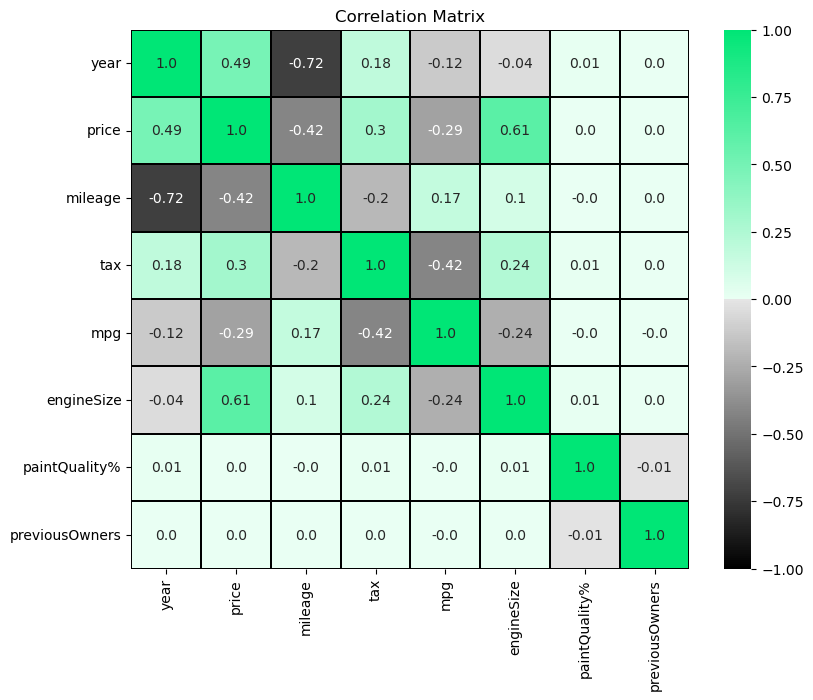

In [83]:
num = df_train_new.select_dtypes(include="number").drop(columns=["carID"], errors="ignore")
corr = num.corr(numeric_only=True).round(2)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

The matrix shows that **car prices** are **positively** related to `engine size` and `year`, and **negatively** related to `mileage`.
Some variables, such as `paintQuality%` and `previousOwners`, do not appear to have a **significant linear relationship** and may be less important for the regression model.

<h2 style="color: #00E676;">2.5. Feature Engenering</h2>

In [84]:
df_train_new.head()
print(df_train_new.shape)
print(df_test_new.shape)

(74122, 13)
(31734, 12)


In [85]:
def new_features(df):
    df["Age"] = 2025 - df["year"] # Car age
    df["Miles_per_year"] = (df["mileage"] / (df["Age"] + 1)).round(2) # miles per year
    df["is_premium"] = df["Brand_clean"].isin({"bmw", "audi", "mercedes"}).astype("int8") # Premium brand
    df["is_auto"] = df["transmission_clean"].isin({"Automatic", "Semi-Auto"}).astype("int8")  # Automatic transmission
    df["is_elec_hybrid"] = df["fuelType_clean"].isin({"Electric", "Hybrid"}).astype("int8")   # Electric or hybrid
    df["l_100km"] = 235.214583 / df["mpg"] # Fuel consumption: L/100km (235.214583 constant conversion from mpg)
    return df

In [86]:
df_train_new = new_features(df_train_new)
df_test_new  = new_features(df_test_new)
print(df_train_new.shape)
print(df_test_new.shape)

(74122, 19)
(31734, 18)


In [87]:
df_train_new.head()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy,Age,Miles_per_year,is_premium,is_auto,is_elec_hybrid,l_100km
0,69512,2016.0,22290,28421.0,145.0,11.42,2.0,63.0,4,Vw,petrol,semi-auto,golf,9.0,2842.10,0,0,0,20.596724
1,53000,2019.0,13790,4589.0,145.0,47.90,1.5,50.0,1,Toyota,petrol,manual,yaris,6.0,655.57,0,0,0,4.910534
2,6366,2019.0,24990,3624.0,145.0,40.90,1.5,56.0,4,Audi,petrol,semi-auto,q2,6.0,517.71,0,0,0,5.750968
3,29021,2018.0,12500,9102.0,145.0,65.70,1.0,50.0,2,Ford,petrol,manual,fiesta,7.0,1137.75,0,0,0,3.580131
4,10062,2019.0,22995,1000.0,145.0,42.80,1.5,97.0,3,Bmw,petrol,manual,2 series,6.0,142.86,0,0,0,5.495668


<h2 style="color: #00E676;">2.6. Data scaling</h2>

In [88]:
X = df_train_new.drop('price', axis= 1)
y = df_train_new['price']

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42
                                                )

In [ ]:
X_train_num = X_train.select_dtypes(include=np.number).drop(
    ["is_premium", "is_auto", "is_elec_hybrid"], axis=1)
X_train_cat = X_train.select_dtypes(exclude=np.number).join(df_train_new[["is_premium", "is_auto", "is_elec_hybrid"]])


X_val_num = X_val.select_dtypes(include=np.number).drop(
    ["is_premium", "is_auto", "is_elec_hybrid"], axis=1)

X_val_cat = X_val.select_dtypes(exclude=np.number).join(df_train_new[["is_premium", "is_auto", "is_elec_hybrid"]])

In [91]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num) 
X_val_num_scaled = scaler.transform(X_val_num) 
X_train_num_scaled

array([[0.47399666, 0.875     , 0.05323546, ..., 0.125     , 0.07944619,
        0.01521502],
       [0.56047702, 0.70833333, 0.17505627, ..., 0.29166667, 0.1808572 ,
        0.01483216],
       [0.38437035, 0.875     , 0.09900959, ..., 0.125     , 0.14775445,
        0.01796335],
       ...,
       [0.24340867, 0.95833333, 0.01129725, ..., 0.04166667, 0.02167999,
        0.01637754],
       [0.50712772, 0.875     , 0.08338726, ..., 0.125     , 0.12444157,
        0.01404108],
       [0.57822064, 0.91666667, 0.05291657, ..., 0.08333333, 0.08884145,
        0.01404108]])

In [92]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train_num.index)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val_num.index)
X_train_num_scaled.head()

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Miles_per_year,l_100km
28093,0.473997,0.875000,0.053235,0.250000,0.131360,0.318182,0.763766,0.500000,0.125000,0.079446,0.015215
49775,0.560477,0.708333,0.175056,0.250000,0.134341,0.318182,0.506990,0.666667,0.291667,0.180857,0.014832
63415,0.384370,0.875000,0.099010,0.258621,0.113264,0.181818,0.722682,0.000000,0.125000,0.147754,0.017963
3529,0.770399,0.875000,0.080493,0.250000,0.111135,0.303030,0.445364,0.166667,0.125000,0.120122,0.018344
10148,0.792724,0.916667,0.034879,0.250000,0.090270,0.212121,0.691869,0.666667,0.083333,0.058560,0.023005


# <h2 style="color: #00E676;">3 Feature Selection</h2>

First approach here is to decide what **feature selection methods** we are going to use. For this we need to take in consideration what type of **target variable** we have. Because it is a **numerical variable** we are going to use for **categorical data** we will use
the **ANOVA filter method** when it comes to numerical data we will use both **Pearson** and **Spearman's**.

<h3 style="color: #00E676;">3.1 Removing CarID</h3>

In [93]:
X_train_num_scaled = X_train_num_scaled.drop(columns=['carID'])
X_val_num_scaled = X_val_num_scaled.drop(columns=['carID'])
X_train_num_scaled.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Miles_per_year,l_100km
28093,0.875000,0.053235,0.250000,0.131360,0.318182,0.763766,0.500000,0.125000,0.079446,0.015215
49775,0.708333,0.175056,0.250000,0.134341,0.318182,0.506990,0.666667,0.291667,0.180857,0.014832
63415,0.875000,0.099010,0.258621,0.113264,0.181818,0.722682,0.000000,0.125000,0.147754,0.017963
3529,0.875000,0.080493,0.250000,0.111135,0.303030,0.445364,0.166667,0.125000,0.120122,0.018344
10148,0.916667,0.034879,0.250000,0.090270,0.212121,0.691869,0.666667,0.083333,0.058560,0.023005


Removed variable CarID because it provides 0 information

In [94]:
X_train_cat.head()

,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy,is_premium,is_auto,is_elec_hybrid
28093,Mercedes,diesel,manual,a class,0,0,0
49775,Mercedes,diesel,automatic,c class,0,0,0
63415,Ford,petrol,manual,fiesta,0,0,0
3529,Ford,diesel,manual,insignia,0,0,0
10148,Opel,petrol,manual,nan,0,0,0


<h3 style="color: #00E676;">3.2 Removing features with low Variance</h3>

In [95]:
X_train_num_scaled.var()

year              0.008101
mileage           0.004479
tax               0.011791
mpg               0.001129
engineSize        0.007396
paintQuality%     0.043980
previousOwners    0.056033
Age               0.008101
Miles_per_year    0.006005
l_100km           0.000147
dtype: float64

Highest Variance (Most Variable):

<p>previousOwners (0.056220) - Most variation in the data</p>
<p>paintQuality% (0.043816) - Second most variable</p>
<p>tax (0.011791)</p>

Lowest Variance (Most Uniform):

<p>l_100km (0.000151) - Almost constant, very little variation</p>
<p>mpg (0.000753) - Also quite uniform</p>





Low variance features may not be useful for modeling because they don't distinguish between observations well

<h3 style="color: #00E676;">3.3 Categorical Features - f_regression</h3>

In [96]:
X_cat = X_train_cat[['Brand_clean', 'model_clean_fuzzy', 'transmission_clean', 'fuelType_clean','is_premium', 'is_auto', 'is_elec_hybrid']]
Y_cat = y_train

X_num = X_train_num_scaled
y_num_train = y_train   
y_num_val = y_val             


In [97]:
X_cat_encoded = pd.get_dummies(X_cat)

In [98]:
f_statistic, p_values = f_regression(X_cat_encoded, y_train)

In [99]:
cat_results = pd.DataFrame({
    'Feature': X_cat_encoded.columns,
    'F_statistic': f_statistic,
    'p_value': p_values
})

# sort 
cat_results.sort_values(by='F_statistic', ascending=False, inplace=True)
cat_results.head(300)

,Feature,F_statistic,p_value
298,transmission_clean_manual,20434.098503,0.000000
300,transmission_clean_semi-auto,10401.085688,0.000000
7,Brand_clean_Mercedes,6434.409806,0.000000
8,Brand_clean_Opel,3520.068803,0.000000
297,transmission_clean_automatic,3016.728389,0.000000
...,...,...,...
87,model_clean_fuzzy_combo lif,0.012728,0.910174
124,model_clean_fuzzy_gol,0.011526,0.914505
290,model_clean_fuzzy_z,0.007400,0.931450
11,Brand_clean_Vw,0.006715,0.934693


The `ANOVA F-test` (via f_regression) revealed that all **encoded categorical variables** exhibited statistically **significant relationships** with the **target variable** (`price`), with p-values **approaching zero**. Features such as `transmission_clean_manual`, `is_premium`, and `Brand_clean_mercedes` obtained the highest F-statistics. These results suggest that `transmission type`, `premium status`, and `brand` are key determinants of vehicle price. However, as this method evaluates each feature independently, further analysis is recommended..

<h2 style="color: #00E676;">3.4 Numeric Features </h2>

<h3 style="color: #00E676;">3.4.1 Spearman </h3>

In [100]:
df_corr = X_num.copy()
corr_spearman =  df_corr.corr(method ='spearman').round(2)
corr_spearman

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Miles_per_year,l_100km
year,1.00,-0.80,0.32,-0.30,-0.03,0.01,-0.00,-1.00,-0.70,0.30
mileage,-0.80,1.00,-0.26,0.31,0.10,-0.00,0.01,0.80,0.99,-0.31
tax,0.32,-0.26,1.00,-0.53,0.14,0.01,-0.00,-0.32,-0.23,0.53
mpg,-0.30,0.31,-0.53,1.00,-0.20,0.00,0.00,0.30,0.31,-1.00
engineSize,-0.03,0.10,0.14,-0.20,1.00,0.00,0.01,0.03,0.10,0.20
paintQuality%,0.01,-0.00,0.01,0.00,0.00,1.00,-0.00,-0.01,-0.00,-0.00
previousOwners,-0.00,0.01,-0.00,0.00,0.01,-0.00,1.00,0.00,0.01,-0.00
Age,-1.00,0.80,-0.32,0.30,0.03,-0.01,0.00,1.00,0.70,-0.30
Miles_per_year,-0.70,0.99,-0.23,0.31,0.10,-0.00,0.01,0.70,1.00,-0.31
l_100km,0.30,-0.31,0.53,-1.00,0.20,-0.00,-0.00,-0.30,-0.31,1.00


In [101]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,7),dpi=100)
    cmap = LinearSegmentedColormap.from_list("black_to_green",
        [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
    )
    norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    sns.heatmap(
        cor,
        annot= True,
        fmt="", 
        cmap=cmap,
        linecolor="black",
        linewidths=0.1,
        norm = norm,
    )
    plt.title("Correlation Matrix")
    plt.show()

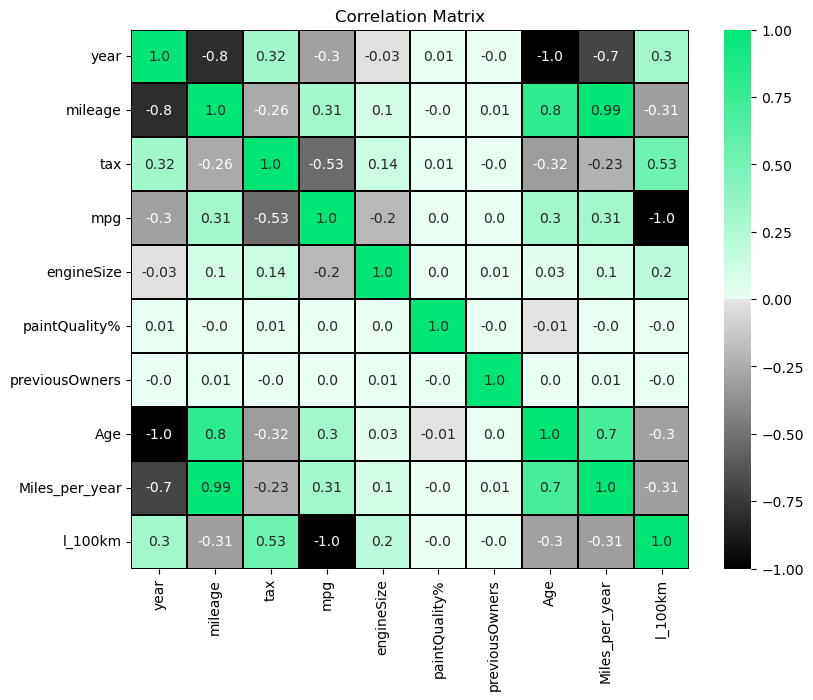

In [102]:
cor_heatmap(corr_spearman)

We can clearly observe that the **features** `paintQuality` and `previousOwners` have very **low correlation** with all the **features** including target

To make a decision we used a threshold of 0.35+ to evaluate a good correlation

<h3 style="color: #00E676;">3.4.2 Pearson </h3>

In [103]:
scores = r_regression(X_num, y_train)

In [104]:
pd.Series(scores, index=X_num.columns)

year              0.487776
mileage          -0.417537
tax               0.293420
mpg              -0.291343
engineSize        0.617377
paintQuality%     0.003621
previousOwners    0.001499
Age              -0.487776
Miles_per_year   -0.379347
l_100km           0.228313
dtype: float64

In [105]:
X_train_num

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,Age,Miles_per_year,l_100km
28093,36011,2017.0,17196.0,145.0,62.8,2.1,76.0,3,8.0,1910.67,3.745455
49775,42581,2013.0,56544.0,145.0,64.2,2.1,51.0,4,12.0,4349.54,3.663779
63415,29202,2017.0,31981.0,150.0,54.3,1.2,72.0,0,8.0,3553.44,4.331760
3529,58529,2017.0,26000.0,145.0,53.3,2.0,45.0,1,8.0,2888.89,4.413032
10148,60225,2018.0,11267.0,145.0,43.5,1.4,69.0,4,7.0,1408.38,5.407232
...,...,...,...,...,...,...,...,...,...,...,...
38121,66494,2019.0,3149.0,145.0,48.7,1.0,35.0,1,6.0,449.86,4.829868
6408,70046,2016.0,13097.0,20.0,62.8,1.0,85.0,0,9.0,1309.70,3.745455
56242,18493,2019.0,3650.0,145.0,58.9,1.0,82.0,2,6.0,521.43,3.993456
880,38528,2017.0,26935.0,20.0,67.3,2.1,87.0,4,8.0,2992.78,3.495016


We observe **low levels** again for `paintQuality` and `previousOwners`

<h3 style="color: #00E676;">3.4.3 RFE with Linear Regression </h3>

In [106]:
number_of_features = np.arange(1, len(X_num.columns)+1)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []


for n in number_of_features:
    estimator = LinearRegression()
    rfe = RFE(estimator, n_features_to_select=n)
    x_train_rfe= rfe.fit_transform(X_train_num_scaled, y_train)
    x_val_rfe = rfe.transform(X_val_num_scaled)
    estimator.fit(x_train_rfe, y_train)
    
    train_score = estimator.score(x_train_rfe, y_train)
    train_score_list.append(train_score)
    
    val_score = estimator.score(x_val_rfe, y_val)
    val_score_list.append(val_score)
    
    
    if (val_score >= high_score):
        high_score = val_score
        nof = n
        features_to_select = pd.Series(rfe.support_, index=X_num.columns)

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select[features_to_select==True].index.tolist()}")

Optimum number of features: 9
Score with 9 features: 0.679164
Features to select: 
['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'Age', 'Miles_per_year', 'l_100km']


<hr>

### Numerical Data

| Predictor      | Spearman | Pearson  | RFE     | Decision               |
| -------------- | -------- | -------- | ------- | ---------------------- |
| `year`           | Keep     | Keep     | Keep    | Include in the model   |
| `mileage`        | Keep     | Keep     | Keep    | Include in the model   |
| `tax`            | Keep?    | Discard? | Keep    | Try with and without   |
| `mpg`            | Keep     | Keep?    | Keep    | Include in the model   |
| `engineSize`    | Keep     | Keep     | Keep    | Include in the model   |
| `paintQuality%`  | Discard  | Discard  | Discard | Discard from the model |
| `previousOwners` | Discard  | Discard  | Discard | Discard from the model |
| `Age`            | Keep     | Keep     | Keep    | Include in the model   |
| `Mile_per_year`  | Keep     | Keep     | Keep    | Include in the model   |
| `l_100_km`       | Keep     | Discard? | Keep    | Try with and without   |


<hr>


### Categorical Data

| Predictor | ANOVA - f_regression | 
| --- | --- | 
| `fuelType_clean` | Keep |  
| `Brand_clean` | Keep | 
| `Model_clean_fuzzy`| Keep|
| `transmission_clean`| Keep|
| `is_premium` | Keep |
| `is_auto` | Discard |
| `is_elec_hybrid` | Discard |

<hr>

<h1 style="color: #00E676;">Predictive Modeling </h1>

<h3 style="color: #00E676;"> Multiple Linear Regression </h3

We choose the **Multiple Linear Regression model** because the objective of this analysis is to **predict** a continuous numerical variable, the car price, based on several **independent features**, both **numerical** and **categorical**.

In [107]:
df_train_new.columns

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'paintQuality%', 'previousOwners', 'Brand_clean', 'fuelType_clean',
       'transmission_clean', 'model_clean_fuzzy', 'Age', 'Miles_per_year',
       'is_premium', 'is_auto', 'is_elec_hybrid', 'l_100km'],
      dtype='object')

<h3 style="color: #00E676;"> Using all features </h3

In [109]:
main_numeric_features= ["year", "mileage", "mpg","engineSize","Age","Miles_per_year"]  

optional_numeric = [
    "tax",
    "l_100km"
]

numeric_features = main_numeric_features + optional_numeric

categorical_features = ["fuelType_clean","Brand_clean", "model_clean_fuzzy", "transmission_clean", "is_premium"]

y = df_train_new["price"]
X = df_train_new[numeric_features + categorical_features]


print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
X.head()

Shape de X: (74122, 13)
Shape de y: (74122,)


,year,mileage,mpg,engineSize,Age,Miles_per_year,tax,l_100km,fuelType_clean,Brand_clean,model_clean_fuzzy,transmission_clean,is_premium
0,2016.0,28421.0,11.42,2.0,9.0,2842.10,145.0,20.596724,petrol,Vw,golf,semi-auto,0
1,2019.0,4589.0,47.90,1.5,6.0,655.57,145.0,4.910534,petrol,Toyota,yaris,manual,0
2,2019.0,3624.0,40.90,1.5,6.0,517.71,145.0,5.750968,petrol,Audi,q2,semi-auto,0
3,2018.0,9102.0,65.70,1.0,7.0,1137.75,145.0,3.580131,petrol,Ford,fiesta,manual,0
4,2019.0,1000.0,42.80,1.5,6.0,142.86,145.0,5.495668,petrol,Bmw,2 series,manual,0


This code selects and organizes **all the variables** (both numerical and categorical) that will be used as inputs (X) to predict the price (y), preparing the data for the next phase.

<h4 style="color: #00E676;"> Data partition </h4

In [110]:
X_train, X_test ,y_train , y_test = train_test_split (X,y,
                                                      test_size= 0.3, random_state=42)

print(X_train.shape, X_test.shape) 

(51885, 13) (22237, 13)


The dataset was divided into **training** (70%) and **validation** (30%) sets using the `train_test_split()` function. The independent variables were defined as X, and the dependent variable `price` as y. A **random_state** of 42 was used to ensure the reproducibility of the split.

<h4 style="color: #00E676;"> Fit the model </h4

In [111]:
#numerical Features
X_train_num = X_train[numeric_features].copy()
X_test_num  = X_test[numeric_features].copy()
    
#Categorical Features

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ohe.fit(X_train[categorical_features])

X_train_cat = pd.DataFrame(
    ohe.transform(X_train[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_test.index
)

    
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)
    
minmax = MinMaxScaler()
X_train_final[numeric_features] = minmax.fit_transform(X_train_final[numeric_features])
X_test_final[numeric_features]  = minmax.transform(X_test_final[numeric_features])

Before training the model, the dataset was preprocessed to ensure that all **variables** were in a **suitable format** for **regression** analysis.
Missing values in the numerical features were replaced using the median strategy, while **categorical variables** were converted into **dummy variables** using One-Hot Encoding.

In [112]:
lin_model = LinearRegression()

In [113]:
lin_model.fit(X_train_final, y_train)

LinearRegression()

In [114]:
predictions = lin_model.predict(X_test_final)
predictions

array([ 4334.87395098, 28022.70168507, 11411.14333602, ...,
       22705.3110429 , 10147.86232866, 22928.98930875])

In [117]:
val_results = pd.DataFrame({
    'y_true': y_test.values.flatten(),
    'y_pred': predictions.flatten()
}, index=y_test.index)

val_results


,y_true,y_pred
39218,6991,4334.873951
71167,27679,28022.701685
2034,11990,11411.143336
4916,15382,17370.138555
11650,20490,22948.933512
...,...,...
69228,27000,28508.766067
37211,9800,8510.138402
18869,21990,22705.311043
72664,10494,10147.862329


A DataFrame `val_results` was created to **compare** the actual values (y_true) with the **predicted values** (y_pred) from the test set.
Viewing the first rows helps quickly assess how well the **model predicts** the target variable.

In [116]:
# Training metrics 
y_pred_train = lin_model.predict(X_train_final)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))


print("TRAINING METRICS")
print(f"R² : {r2_train:.4f}")
print(f"MAE : {mae_train:.4f}")
print(f"RMSE: {rmse_train:.2f}")

TRAINING METRICS
R² : 0.8495
MAE : 2342.7100
RMSE: 3792.22


The model’s performance on the training set was evaluated using the metrics `R²`, `MAE`, and `RMSE`. An `R²` of **0.8415** indicates that the model explains about **84.2%** of the variability in the training data, showing a good fit. The relatively low `MAE` (**≈2369€**) and `RMSE` (**≈3891€**) confirm that the model’s predictions are close to the actual values.

In [118]:
# Validation metrics 
r2_val = r2_score(y_test, predictions)
mae_val = mean_absolute_error(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))

print("VALIDATION METRICS:")
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')
print(f"RMSE: {rmse_test:.2f}")

VALIDATION METRICS:
R²: 0.8373
MAE: 2363.7619
RMSE: 3895.57


The model’s performance on the validation set was assessed using `R²`, `MAE`, and `RMSE`. An `R²` of **0.8263** indicates that the model explains about **82%** of the variance in unseen data, showing strong generalization. The low `MAE` (**≈2389€**) and `RMSE` (**≈4024€**) confirm that prediction errors remain small and consistent with the training results, suggesting no significant overfitting.

<h4 style="color: #00E676;"> Evaluate the model </h4

In [ ]:
lin_model.coef_

In [ ]:
coefs_df = (
    pd.DataFrame({
        'Variable': X_train_final.columns,
        'Coefficient': lin_model.coef_.flatten()
    })
    .assign(abs_value=lambda d: d['Coefficient'].abs())  
    .sort_values('abs_value', ascending=False)
)

coefs_df.head()

In [ ]:
float(lin_model.intercept_)

The **intercept value** (≈21,642€) represents the baseline **average price** for the reference group — that is, a car with average or zero values for all numerical variables and belonging to the base categories of the categorical variables (those omitted after One-Hot Encoding).

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.4, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price(€)")
plt.ylabel("Predicted price (€)")
plt.title("Actual vs Predicted Values")
plt.show()

The **scatter plot** illustrates the **relationship** between the **real car prices** and the **predicted prices** obtained from the **multiple linear** regression model. Most **data points** are clustered close to the **red dashed line** (y = x), showing that the model **predicts prices** with **good accuracy** and **low error** for the majority of vehicles. However, a **few points** deviate further from the line, particularly at **higher price ranges** (above €70,000), indicating that the model tends to be less precise for **luxury** or **high-end cars**, where price variability is greater.

<h3 style="color: #00E676;"> Without optional features </h3

In [ ]:
main_numeric_features= ["year", "mileage", "mpg","engineSize","Age","Mile_per_year"]   
categorical_features = ["fuelType_clean","Brand_clean", "model_clean_fuzzy", "transmission_clean", "is_premium"]

y = df_train_new["price"]
X = df_train_new[main_numeric_features + categorical_features]


print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
X.head()

In [ ]:
X_train, X_test ,y_train , y_test = train_test_split (X,y,
                                                     test_size= 0.3,
                                                     random_state=42)
print(X_train.shape, X_test.shape)

In [ ]:
#Numeric Features
X_train_num = X_train[main_numeric_features].copy()
X_test_num  = X_test[main_numeric_features].copy()
    
#Categorical Features

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ohe.fit(X_train[categorical_features])

X_train_cat = pd.DataFrame(
    ohe.transform(X_train[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    ohe.transform(X_test[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_test.index
)

    
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)
    
scaler = StandardScaler()
X_train_final[main_numeric_features] = scaler.fit_transform(X_train_final[main_numeric_features])
X_test_final[main_numeric_features] = scaler.transform(X_test_final[main_numeric_features])

In [ ]:
lin_model = LinearRegression()

In [ ]:
lin_model.fit(X_train_final, y_train)

In [ ]:
predictions = lin_model.predict(X_test_final)
predictions

In [ ]:

val_results = pd.DataFrame({
    'y_true': y_test.values.flatten(),
    'y_pred': predictions.flatten()
}, index=y_test.index)

val_results.head()

In [ ]:
# Training metrics 
y_pred_train = lin_model.predict(X_train_final)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))


print("TRAINING METRICS")
print(f"R² : {r2_train:.4f}")
print(f"MAE : {mae_train:.4f}")
print(f"RMSE: {rmse_train:.2f}")

On the training set, the **multiple linear** regression model without the optional features achieved an `R²` of **0.8390**, meaning it explains about **83%** of the variability in car prices. The `MAE` (≈ **€2392**) and `RMSE` (≈ **€3992**) indicate that the **model’s prediction errors** are relatively **small and consistent**. These results show that the model fits the training data well, accurately capturing the **main relationships** between the predictors and the target variable.

In [ ]:
# Validation metrics 
r2_val = r2_score(y_test, predictions)
mae_val = mean_absolute_error(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))

print("VALIDATION METRICS:")
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')
print(f"RMSE: {rmse_test:.2f}")

On the validation set, the model obtained an `R²` of **0.8231**, slightly lower than in training, which is expected when testing on unseen data.
The `MAE` (≈ **€2407**) and `RMSE` (≈ **€4061**) are very close to the **training errors**, demonstrating good generalization and confirming that the model is **not overfitting**. Overall, the model maintains **strong predictive performance**, effectively estimating car prices based only on the core features.

In [ ]:
lin_model.coef_

In [ ]:
coefs_df = (
    pd.DataFrame({
        'Variable': X_train_final.columns,
        'Coefficient': lin_model.coef_.flatten()
    })
    .assign(abs_value=lambda d: d['Coefficient'].abs())  
    .sort_values('abs_value', ascending=False)
)

coefs_df.head(15)

In [ ]:
float(lin_model.intercept_)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.4, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual price (€)")
plt.ylabel("Predicted price (€)")
plt.title("Actual vs Predicted values")
plt.show()


The **multiple linear regression model** without the optional features achieved an `R²` of approximately **0.82**, meaning it explains about **82%** of the **variability** in car prices. The **actual** vs **predicted** price plot shows that most observations are closely aligned with the reference line (y = x), indicating that the model performs consistently and accurately for the majority of vehicles. Despite minor deviations in higher price ranges, the model demonstrates **solid predictive performance** and **stability**, **effectively estimating** car prices using only the core features.

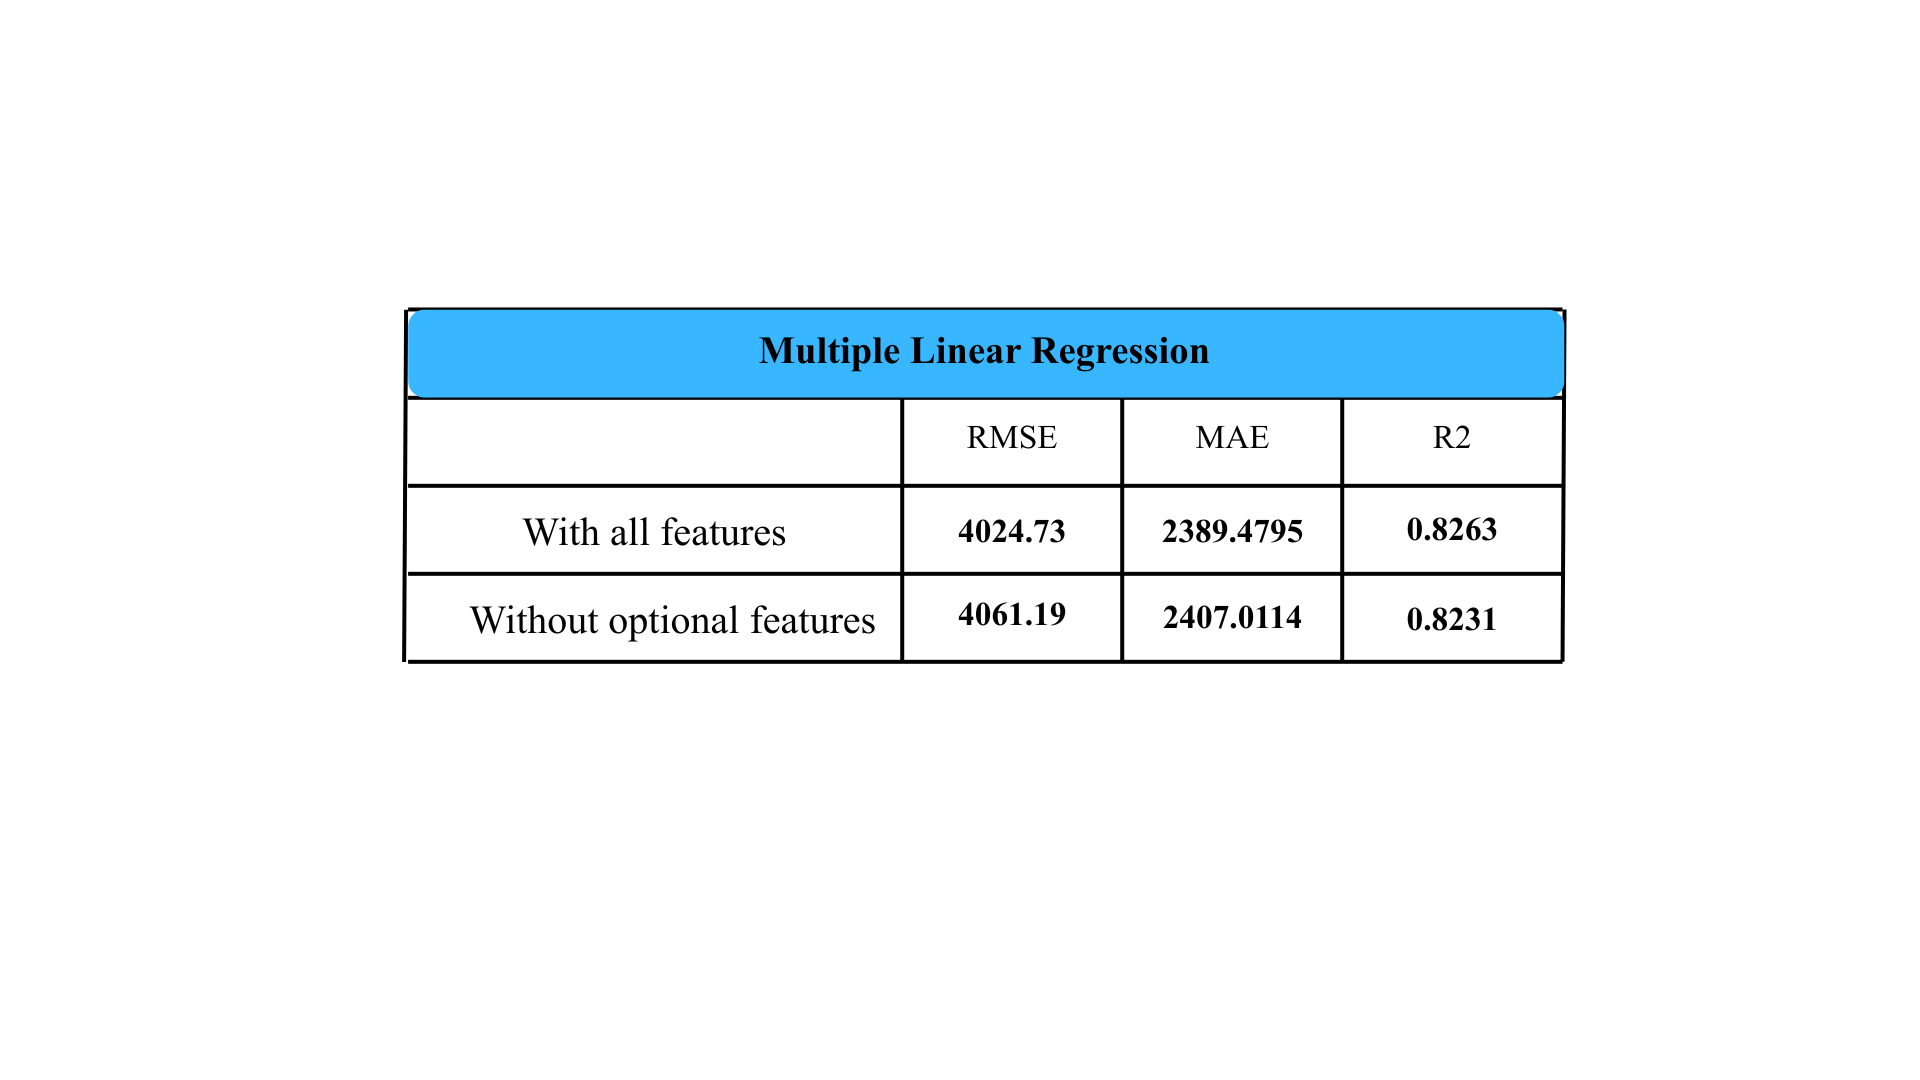

**Conclusion**:  The **multiple linear regression model** developed for Cars 4 You demonstrated solid predictive performance, achieving an `R²` of **0.8263** when using all features and **0.8231** when excluding the optional ones. These results confirm that the **model can reliably estimate** car prices based on user-provided information, effectively capturing the **relationship** between **vehicle characteristics** and **market value**. By automating the price estimation process, Cars 4 You can streamline its operations, reduce dependency on manual inspections, and offer a faster and more efficient service to potential sellers.